# Student#: 501177872
# Name: Shankar Ghimire
# Program: Data Analytics, Big Data, and Predictive Analytics

The dataset on ‘Energy and water usage of large buildings in Ontario’ provides comprehensive information on various aspects including property types, energy and water consumption, greenhouse gas emissions, and energy efficiency scores etc. The dataset contains 6,864 rows and 32 columns. This research will explore the dataset and aims to find the following insights:

What are the key drivers of energy efficiency across different property types?
How do greenhouse gas (GHG) emissions vary by location and property type?
What is the relationship between water usage and energy consumption in large buildings?

DataSet Source URL:

https://data.ontario.ca/dataset/0eab2faf-6186-4a5b-8de1-b15872943c24/resource/f53db89b-d5e0-49ea-aa85-70453d969453/download/energy_large_building_energy_water_ghgs_2022.xlsx

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler        #Normalize the dataset
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving energy_large_building_energy_water_ghgs_2022.xlsx to energy_large_building_energy_water_ghgs_2022.xlsx


In [3]:
#Load Dataset
df = pd.read_excel('energy_large_building_energy_water_ghgs_2022.xlsx')
#print top records
df.head(15)

,EWRB_ID,City,Postal_Code,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,...,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N)
0,105666,Toronto,M5A,Office,Office,Office,Office,2019 ENERGY STAR Building Certification,0.259626,6.7,...,15.36,0.848239,21.89,19.375040,1.8,Not Available,"2021, 2020, 2019",Yes,2023-06-19,N
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,BOMA,0.298376,7.7,...,17.23,0.957514,24.71,20.451431,1.9,11,Not Available,Yes,2023-06-08,N
2,125538,Toronto,M4W,Office,Office,Office,"Office , Supermarket/Grocery Store , Parking...",BOMA 360,0.538626,13.9,...,Not Available,Not Available,Not Available,0.000000,0.0,Not Available,Not Available,Yes,2023-06-07,N
3,105425,Toronto,M5C,Office,Office,Office,"Data Center , Office, Parking, Other",BOMA 360,0.418501,10.8,...,21.25,1.228765,31.71,23.680604,2.2,74,Not Available,Yes,2023-06-07,N
4,105253,Toronto,M5H,Office,Office,Office,"Data Center , Office, Parking, Other",BOMA 360,0.379751,9.8,...,18.87,1.09934,28.37,20.451431,1.9,88,Not Available,Yes,2023-06-07,N
5,105101,Toronto,M5N,Office,Office,Office,"Office , Other",BOMA 360,0.244126,6.3,...,19.64,0.924577,23.86,0.000000,0.0,85,Not Available,Yes,2023-06-07,N
6,105116,Toronto,M5J,Office,Office,Office,Office,BOMA BEST,Not Available,Not Available,...,Not Available,Not Available,Not Available,0.000000,0.0,Not Available,Not Available,No,Not Available,N
7,117124,Kitchener,N2A,Enclosed Mall,Enclosed Mall,Enclosed Mall,"Parking , Enclosed Mall",BOMA BEST,Not Available,Not Available,...,Not Available,Not Available,Not Available,0.000000,0.0,Not Available,Not Available,No,Not Available,Y
8,117255,Kitchener,N2C,Lifestyle Center,Lifestyle Center,Lifestyle Center,"Lifestyle Center , Parking",BOMA BEST,Not Available,Not Available,...,Not Available,Not Available,Not Available,0.000000,0.0,Not Available,Not Available,No,Not Available,Y
9,117479,Waterloo,N2J,Strip Mall,Strip Mall,Strip Mall,"Strip Mall , Parking",BOMA BEST,Not Available,Not Available,...,Not Available,Not Available,Not Available,0.000000,0.0,Not Available,Not Available,No,Not Available,Y


In [4]:
# print columns heading
df.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'PrimPropTypCalc', 'PrimPropTypSelf',
       'Largest_PropTyp', 'All_Prop_Types', 'Thrd_Party_Cert',
       'WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1',
       'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1',
       'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1',
       'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score', 'Ener_Star_Certs',
       'Data_Qual_Check', 'Data_Qual_Date',
       'Calculated with new source factors (Y/N)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   EWRB_ID                                   6864 non-null   int64  
 1   City                                      6864 non-null   object 
 2   Postal_Code                               6864 non-null   object 
 3   PrimPropTypCalc                           6864 non-null   object 
 4   PrimPropTypSelf                           6864 non-null   object 
 5   Largest_PropTyp                           6864 non-null   object 
 6   All_Prop_Types                            6864 non-null   object 
 7   Thrd_Party_Cert                           6864 non-null   object 
 8   WN_Sit_Elc_Int1                           6864 non-null   object 
 9   WN_Sit_Elc_Int2                           6864 non-null   object 
 10  WN_Sit_Gas_Int1                     

In [6]:
# checking the dataset that contains duplicate records or not i.e. matching entire row
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
# Check if there are any duplicate rows
if not duplicate_rows.empty:
    print("The dataset contains duplicate records.")
else:
    print("The dataset does not contain any duplicate records.")

Empty DataFrame
Columns: [EWRB_ID, City, Postal_Code, PrimPropTypCalc, PrimPropTypSelf, Largest_PropTyp, All_Prop_Types, Thrd_Party_Cert, WN_Sit_Elc_Int1, WN_Sit_Elc_Int2, WN_Sit_Gas_Int1, WN_Sit_Gas_Int2, WN_Sit_Gas_Int3, All_Water_Int1, All_Water_Int2, Ind_Water_Int1, Ind_Water_Int2, Site_EUI1, Site_EUI2, Source_EUI1, Source_EUI2, WN_Site_EUI1, WN_Site_EUI2, WN_Source_EUI1, WN_Source_EUI2, GHG_Emiss_Int1, GHG_Emiss_Int2, Ener_Star_Score, Ener_Star_Certs, Data_Qual_Check, Data_Qual_Date, Calculated with new source factors (Y/N)]
Index: []

[0 rows x 32 columns]
The dataset does not contain any duplicate records.


In [7]:
df.head()

,EWRB_ID,City,Postal_Code,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,...,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N)
0,105666,Toronto,M5A,Office,Office,Office,Office,2019 ENERGY STAR Building Certification,0.259626,6.7,...,15.36,0.848239,21.89,19.375040,1.8,Not Available,"2021, 2020, 2019",Yes,2023-06-19,N
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,BOMA,0.298376,7.7,...,17.23,0.957514,24.71,20.451431,1.9,11,Not Available,Yes,2023-06-08,N
2,125538,Toronto,M4W,Office,Office,Office,"Office , Supermarket/Grocery Store , Parking...",BOMA 360,0.538626,13.9,...,Not Available,Not Available,Not Available,0.000000,0.0,Not Available,Not Available,Yes,2023-06-07,N
3,105425,Toronto,M5C,Office,Office,Office,"Data Center , Office, Parking, Other",BOMA 360,0.418501,10.8,...,21.25,1.228765,31.71,23.680604,2.2,74,Not Available,Yes,2023-06-07,N
4,105253,Toronto,M5H,Office,Office,Office,"Data Center , Office, Parking, Other",BOMA 360,0.379751,9.8,...,18.87,1.09934,28.37,20.451431,1.9,88,Not Available,Yes,2023-06-07,N


In [8]:
# Define a function to categorize building types
def categorize_property_type(prop_type):
  prop_type = prop_type.lower()
  if 'warehouse' in prop_type or 'manufacturing' in prop_type or 'industrial' in prop_type or 'laboratory' in prop_type:
      return 'Industrial'
  elif 'multifamily' in prop_type or 'residential' in prop_type or 'worship' in prop_type or 'residence' in prop_type or 'single-family' in prop_type or 'living' in prop_type:
      return 'Residential'
  elif 'office' in prop_type or 'retail' in prop_type or 'mall' in prop_type or 'distribution' in prop_type or 'store' in prop_type or 'dealership' in prop_type or 'restaurant' in prop_type or 'fitness' in prop_type or 'rink' in prop_type or 'recreation' in prop_type or 'parking' in prop_type or 'arts' in prop_type or 'therapy' in prop_type or 'sale' in prop_type or 'casino' in prop_type or 'movie' in prop_type or 'lifestyle' in prop_type:
      return 'Commercial'
  else:
      return 'Other'

In [9]:
# Apply the function to create a new column 'Property_Type' on the basis of the values of 'All_Prop_Types' column
df['Property_Type'] = df['All_Prop_Types'].apply(categorize_property_type)

# Drop the colunns
df.drop(['PrimPropTypCalc', 'PrimPropTypSelf', 'Largest_PropTyp'], axis=1, inplace=True)

In [10]:
df.head()

,EWRB_ID,City,Postal_Code,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,...,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,2019 ENERGY STAR Building Certification,0.259626,6.7,0.340613,9.131721,0.848365,...,0.848239,21.89,19.375040,1.8,Not Available,"2021, 2020, 2019",Yes,2023-06-19,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,BOMA,0.298376,7.7,0.340613,9.131721,0.848365,...,0.957514,24.71,20.451431,1.9,11,Not Available,Yes,2023-06-08,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",BOMA 360,0.538626,13.9,Not Available,Not Available,Not Available,...,Not Available,Not Available,0.000000,0.0,Not Available,Not Available,Yes,2023-06-07,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",BOMA 360,0.418501,10.8,0.454151,12.175628,1.131153,...,1.228765,31.71,23.680604,2.2,74,Not Available,Yes,2023-06-07,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",BOMA 360,0.379751,9.8,0.340613,9.131721,0.848365,...,1.09934,28.37,20.451431,1.9,88,Not Available,Yes,2023-06-07,N,Commercial


In [11]:
df.tail()

,EWRB_ID,City,Postal_Code,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,...,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N),Property_Type
6859,122338,Stittsville,K2S,Retail Store,Not Available,0,0,Not Available,Not Available,Not Available,...,0.388276,10.02,18.298649,1.7,100,Not Available,Yes,2023-10-31,Y,Commercial
6860,100495,Ottawa,K2P,"Multifamily Housing, Parking",Ontario EWRB Reporting,0.430126,11.1,0.227075,6.087814,0.565576,...,1.019902,26.32,11.840302,1.1,67,Not Available,Yes,2023-05-31,N,Residential
6861,107481,Toronto,M3B,Office,Oskar Mokwa,0.356501,9.2,0.681226,18.263443,1.696729,...,1.383378,35.7,36.597298,3.4,59,Not Available,No,Not Available,N,Commercial
6862,107483,Toronto,M3B,Office,Oskar Mokwa,0.248001,6.4,0.340613,9.131721,0.848365,...,0.797089,20.57,17.222258,1.6,95,Not Available,Yes,2023-06-19,N,Commercial
6863,137896,Toronto,M3B,Self-Storage Facility,Oskar Mokwa,0.1395,3.6,0.567689,15.219535,1.413941,...,0.797089,20.57,26.909778,2.5,47,Not Available,No,Not Available,N,Other


In [12]:
# print only the All_Prop_Types and Properties_Type columns
temp = df[['All_Prop_Types', 'Property_Type']]
temp

,All_Prop_Types,Property_Type
0,Office,Commercial
1,Non-Refrigerated Warehouse,Industrial
2,"Office , Supermarket/Grocery Store , Parking...",Commercial
3,"Data Center , Office, Parking, Other",Commercial
4,"Data Center , Office, Parking, Other",Commercial
...,...,...
6859,Retail Store,Commercial
6860,"Multifamily Housing, Parking",Residential
6861,Office,Commercial
6862,Office,Commercial


In [13]:
# print columns heading
df.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'All_Prop_Types', 'Thrd_Party_Cert',
       'WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1',
       'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1',
       'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1',
       'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score', 'Ener_Star_Certs',
       'Data_Qual_Check', 'Data_Qual_Date',
       'Calculated with new source factors (Y/N)', 'Property_Type'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   EWRB_ID                                   6864 non-null   int64  
 1   City                                      6864 non-null   object 
 2   Postal_Code                               6864 non-null   object 
 3   All_Prop_Types                            6864 non-null   object 
 4   Thrd_Party_Cert                           6864 non-null   object 
 5   WN_Sit_Elc_Int1                           6864 non-null   object 
 6   WN_Sit_Elc_Int2                           6864 non-null   object 
 7   WN_Sit_Gas_Int1                           6864 non-null   object 
 8   WN_Sit_Gas_Int2                           6864 non-null   object 
 9   WN_Sit_Gas_Int3                           6864 non-null   object 
 10  All_Water_Int1                      

In [15]:
# list of numeric attributes
# From the data dictionary file info:
# ontario_large_building_energy_water_ghgs_data_dictionary.xlsx
numeric_attributes = ['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1',
       'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1',
       'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1',
       'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score']

#list of category attributs
# category_attributes  = ['Property_Type','Data_Qual_Check', 'Calculated with new source factors (Y/N)']
category_attributes  = ['All_Prop_Types','Property_Type','Data_Qual_Check', 'Calculated with new source factors (Y/N)']

#list of datetime attributes
datetime_attributes = ['Data_Qual_Date']

print("Numeric Attributes:")
print(numeric_attributes)
print("Categorical Attributes:")
print(category_attributes)
print("DateTime Attributes:")
print(category_attributes)

Numeric Attributes:
['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score']
Categorical Attributes:
['All_Prop_Types', 'Property_Type', 'Data_Qual_Check', 'Calculated with new source factors (Y/N)']
DateTime Attributes:
['All_Prop_Types', 'Property_Type', 'Data_Qual_Check', 'Calculated with new source factors (Y/N)']


In [16]:
#To replace 'Not Available' values with NaN in numerical columns
# Replace 'Not Available' with blank (empty string) across specified columns
df.replace('Not Available', pd.NA, inplace=True)
df.head(15)

,EWRB_ID,City,Postal_Code,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,...,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,2019 ENERGY STAR Building Certification,0.259626,6.7,0.340613,9.131721,0.848365,...,0.848239,21.89,19.375040,1.8,<NA>,"2021, 2020, 2019",Yes,2023-06-19,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,BOMA,0.298376,7.7,0.340613,9.131721,0.848365,...,0.957514,24.71,20.451431,1.9,11,<NA>,Yes,2023-06-08,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",BOMA 360,0.538626,13.9,<NA>,<NA>,<NA>,...,<NA>,<NA>,0.000000,0.0,<NA>,<NA>,Yes,2023-06-07,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",BOMA 360,0.418501,10.8,0.454151,12.175628,1.131153,...,1.228765,31.71,23.680604,2.2,74,<NA>,Yes,2023-06-07,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",BOMA 360,0.379751,9.8,0.340613,9.131721,0.848365,...,1.09934,28.37,20.451431,1.9,88,<NA>,Yes,2023-06-07,N,Commercial
5,105101,Toronto,M5N,"Office , Other",BOMA 360,0.244126,6.3,0.340613,9.131721,0.848365,...,0.924577,23.86,0.000000,0.0,85,<NA>,Yes,2023-06-07,N,Commercial
6,105116,Toronto,M5J,Office,BOMA BEST,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,0.000000,0.0,<NA>,<NA>,No,<NA>,N,Commercial
7,117124,Kitchener,N2A,"Parking , Enclosed Mall",BOMA BEST,<NA>,<NA>,0.340613,9.131721,0.848365,...,<NA>,<NA>,0.000000,0.0,<NA>,<NA>,No,<NA>,Y,Commercial
8,117255,Kitchener,N2C,"Lifestyle Center , Parking",BOMA BEST,<NA>,<NA>,0.681226,18.263443,1.696729,...,<NA>,<NA>,0.000000,0.0,<NA>,<NA>,No,<NA>,Y,Commercial
9,117479,Waterloo,N2J,"Strip Mall , Parking",BOMA BEST,<NA>,<NA>,0.454151,12.175628,1.131153,...,<NA>,<NA>,0.000000,0.0,<NA>,<NA>,No,<NA>,Y,Commercial


In [17]:
#Print datatype of each attribute/variable
df.dtypes

,0
EWRB_ID,int64
City,object
Postal_Code,object
All_Prop_Types,object
Thrd_Party_Cert,object
WN_Sit_Elc_Int1,object
WN_Sit_Elc_Int2,object
WN_Sit_Gas_Int1,object
WN_Sit_Gas_Int2,object
WN_Sit_Gas_Int3,object


In [ ]:
# Get the unique values from the 'All_Prop_Types' column
# unique_values = df['All_Prop_Types'].unique()

# # Convert the unique values to a list
# unique_values_list = unique_values.tolist()
# unique_values_list
#print(unique_values_list)

In [18]:
# still some numeric attributes are shown as 'object' data type
# Converting those into numerica atributes
df[numeric_attributes] = df[numeric_attributes].apply(pd.to_numeric, errors='coerce')

In [19]:
# List of columns to convert from Object into category
# Convert specified columns to cagegory
df[category_attributes] = df[category_attributes].astype('category')

In [20]:
# List of columns to convert from Object into datetime
# Convert to datetime
df['Data_Qual_Date'] = pd.to_datetime(df['Data_Qual_Date'], errors='coerce')

In [21]:
#print datatype
df.dtypes

,0
EWRB_ID,int64
City,object
Postal_Code,object
All_Prop_Types,category
Thrd_Party_Cert,object
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64
WN_Sit_Gas_Int1,float64
WN_Sit_Gas_Int2,float64
WN_Sit_Gas_Int3,float64


In [22]:
# check the missing values in each column
df.isnull().sum()

,0
EWRB_ID,0
City,0
Postal_Code,0
All_Prop_Types,0
Thrd_Party_Cert,6721
WN_Sit_Elc_Int1,442
WN_Sit_Elc_Int2,442
WN_Sit_Gas_Int1,821
WN_Sit_Gas_Int2,821
WN_Sit_Gas_Int3,821


In [23]:
#Handling Missing values in numeric attributes
# replacing missing values by the mean of the column
df[numeric_attributes] = df[numeric_attributes].apply(lambda col: col.fillna(col.mean()))
df.head(15)

,EWRB_ID,City,Postal_Code,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,...,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,2019 ENERGY STAR Building Certification,0.259626,6.700000,0.340613,9.131721,0.848365,...,0.848239,21.890000,19.375040,1.8,53.424766,"2021, 2020, 2019",Yes,2023-06-19,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,BOMA,0.298376,7.700000,0.340613,9.131721,0.848365,...,0.957514,24.710000,20.451431,1.9,11.000000,<NA>,Yes,2023-06-08,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",BOMA 360,0.538626,13.900000,0.721659,19.347429,1.797435,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,Yes,2023-06-07,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",BOMA 360,0.418501,10.800000,0.454151,12.175628,1.131153,...,1.228765,31.710000,23.680604,2.2,74.000000,<NA>,Yes,2023-06-07,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",BOMA 360,0.379751,9.800000,0.340613,9.131721,0.848365,...,1.099340,28.370000,20.451431,1.9,88.000000,<NA>,Yes,2023-06-07,N,Commercial
5,105101,Toronto,M5N,"Office , Other",BOMA 360,0.244126,6.300000,0.340613,9.131721,0.848365,...,0.924577,23.860000,0.000000,0.0,85.000000,<NA>,Yes,2023-06-07,N,Commercial
6,105116,Toronto,M5J,Office,BOMA BEST,0.432220,11.154049,0.721659,19.347429,1.797435,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,No,NaT,N,Commercial
7,117124,Kitchener,N2A,"Parking , Enclosed Mall",BOMA BEST,0.432220,11.154049,0.340613,9.131721,0.848365,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,No,NaT,Y,Commercial
8,117255,Kitchener,N2C,"Lifestyle Center , Parking",BOMA BEST,0.432220,11.154049,0.681226,18.263443,1.696729,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,No,NaT,Y,Commercial
9,117479,Waterloo,N2J,"Strip Mall , Parking",BOMA BEST,0.432220,11.154049,0.454151,12.175628,1.131153,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,No,NaT,Y,Commercial


In [24]:
#Handling Missing values in Categorical attributes
# Replace missing values with the mode for these specific columns
for col in category_attributes:
    mode_value = df[col].mode()[0]  # Get the mode (most frequent value)
    df[col] = df[col].fillna(mode_value)

In [25]:
#Handling missing values in the datetime attribute
# replacing the missing date value using the Backward fill
df['Data_Qual_Date'] = df['Data_Qual_Date'].fillna(method='bfill')

<ipython-input-25-c7108108333e>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Data_Qual_Date'] = df['Data_Qual_Date'].fillna(method='bfill')


In [26]:
df.head(15)

,EWRB_ID,City,Postal_Code,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,...,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,2019 ENERGY STAR Building Certification,0.259626,6.700000,0.340613,9.131721,0.848365,...,0.848239,21.890000,19.375040,1.8,53.424766,"2021, 2020, 2019",Yes,2023-06-19,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,BOMA,0.298376,7.700000,0.340613,9.131721,0.848365,...,0.957514,24.710000,20.451431,1.9,11.000000,<NA>,Yes,2023-06-08,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",BOMA 360,0.538626,13.900000,0.721659,19.347429,1.797435,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,Yes,2023-06-07,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",BOMA 360,0.418501,10.800000,0.454151,12.175628,1.131153,...,1.228765,31.710000,23.680604,2.2,74.000000,<NA>,Yes,2023-06-07,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",BOMA 360,0.379751,9.800000,0.340613,9.131721,0.848365,...,1.099340,28.370000,20.451431,1.9,88.000000,<NA>,Yes,2023-06-07,N,Commercial
5,105101,Toronto,M5N,"Office , Other",BOMA 360,0.244126,6.300000,0.340613,9.131721,0.848365,...,0.924577,23.860000,0.000000,0.0,85.000000,<NA>,Yes,2023-06-07,N,Commercial
6,105116,Toronto,M5J,Office,BOMA BEST,0.432220,11.154049,0.721659,19.347429,1.797435,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,No,2023-06-14,N,Commercial
7,117124,Kitchener,N2A,"Parking , Enclosed Mall",BOMA BEST,0.432220,11.154049,0.340613,9.131721,0.848365,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,No,2023-06-14,Y,Commercial
8,117255,Kitchener,N2C,"Lifestyle Center , Parking",BOMA BEST,0.432220,11.154049,0.681226,18.263443,1.696729,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,No,2023-06-14,Y,Commercial
9,117479,Waterloo,N2J,"Strip Mall , Parking",BOMA BEST,0.432220,11.154049,0.454151,12.175628,1.131153,...,2.115864,54.602819,0.000000,0.0,53.424766,<NA>,No,2023-06-14,Y,Commercial


In [27]:
# check the missing values in each column
df.isnull().sum()

,0
EWRB_ID,0
City,0
Postal_Code,0
All_Prop_Types,0
Thrd_Party_Cert,6721
WN_Sit_Elc_Int1,0
WN_Sit_Elc_Int2,0
WN_Sit_Gas_Int1,0
WN_Sit_Gas_Int2,0
WN_Sit_Gas_Int3,0


In [28]:
# Attributes 'Thrd_Party_Cert' and 'Ener_Star_Certs' contain the nominal data in the dataset
# and having large number of missing values
# So, dropping these two attributes instead of handling the missing values
df.drop(['Thrd_Party_Cert', 'Ener_Star_Certs'], axis=1, inplace=True)
df.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'All_Prop_Types', 'WN_Sit_Elc_Int1',
       'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2',
       'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1',
       'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1',
       'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1',
       'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score',
       'Data_Qual_Check', 'Data_Qual_Date',
       'Calculated with new source factors (Y/N)', 'Property_Type'],
      dtype='object')

In [29]:
# drop Data_Qual_date from the dataset
#Does not seem any relevent any research question analysis
df = df.drop('Data_Qual_Date', axis=1)
df.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'All_Prop_Types', 'WN_Sit_Elc_Int1',
       'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2',
       'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1',
       'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1',
       'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1',
       'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score',
       'Data_Qual_Check', 'Calculated with new source factors (Y/N)',
       'Property_Type'],
      dtype='object')

In [30]:
# check the missing values in each column
df.isnull().sum()

,0
EWRB_ID,0
City,0
Postal_Code,0
All_Prop_Types,0
WN_Sit_Elc_Int1,0
WN_Sit_Elc_Int2,0
WN_Sit_Gas_Int1,0
WN_Sit_Gas_Int2,0
WN_Sit_Gas_Int3,0
All_Water_Int1,0


In [31]:
# statistical summary of numeric attributes
statistical_summary = df[numeric_attributes].describe()
statistical_summary

,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,All_Water_Int2,Ind_Water_Int1,Ind_Water_Int2,Site_EUI1,Site_EUI2,Source_EUI1,Source_EUI2,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000
mean,0.432220,11.154049,0.721659,19.347429,1.797435,7.384968,0.686086,1.414857,1.414857,3.046287,78.613708,3.722794,96.071896,1.530658,39.500776,2.115864,54.602819,127.502949,11.845411,53.424766
std,0.576274,14.871565,2.580018,69.169380,6.426045,214.344317,19.913237,19.386984,19.386984,125.159115,3229.905971,134.529148,3471.712777,28.051603,723.910835,37.340117,963.613929,6377.020709,592.444572,25.011320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197625,5.100000,0.340613,9.131721,0.848365,0.326275,0.030312,0.139891,0.139891,0.611961,15.792500,0.848239,21.890000,0.639376,16.500000,0.884664,22.830000,17.222258,1.600000,42.000000
50%,0.313876,8.100000,0.567689,15.219535,1.413941,0.945311,0.087822,1.414857,1.414857,0.833514,21.510000,1.134021,29.265000,0.874589,22.570000,1.189240,30.690000,25.833387,2.400000,53.424766
75%,0.445626,11.500000,0.721659,19.347429,1.797435,1.675991,0.155705,1.414857,1.414857,1.115518,28.787500,1.546903,39.920000,1.246978,32.180000,1.723410,44.475000,37.673689,3.500000,69.000000
max,18.607788,480.200000,97.756377,2620.814391,243.481609,13788.335021,1280.978158,1280.978158,1280.978158,10113.624400,260996.220000,10720.754840,276664.070000,1756.900339,45339.270000,2339.960780,60385.960000,508441.952202,47235.800000,100.000000


In [32]:
#statistical summary of categorical attribute
categorical_summary = df[category_attributes].describe()
categorical_summary

,All_Prop_Types,Property_Type,Data_Qual_Check,Calculated with new source factors (Y/N)
count,6864,6864,6864,6864
unique,353,4,2,2
top,Multifamily Housing,Residential,Yes,N
freq,1497,3386,3634,5279


  Property Type  Count  Percentage
0   Residential   3386       49.33
1    Commercial   2139       31.16
2    Industrial    859       12.51
3         Other    480        6.99



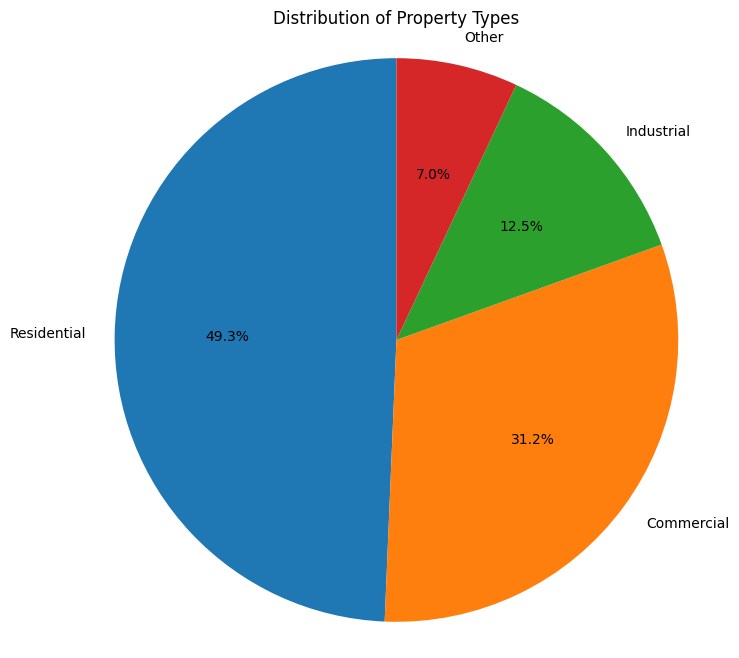

In [34]:
# count the property_type and also calculate its percent of each proper type, round it upto two decimal places and print it in two different coluns

# Calculate the count and percentage of each property type
property_type_counts = df['Property_Type'].value_counts()
property_type_percentages = (property_type_counts / len(df)) * 100

# Create a DataFrame for the results
property_type_summary = pd.DataFrame({
    'Property Type': property_type_counts.index,
    'Count': property_type_counts.values,
    'Percentage': property_type_percentages.round(2).values
})

# Print the summary
print(property_type_summary)
print()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(property_type_summary['Percentage'], labels=property_type_summary['Property Type'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Property Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [35]:
df.head()

,EWRB_ID,City,Postal_Code,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,0.259626,6.7,0.340613,9.131721,0.848365,0.188247,...,0.595201,15.360000,0.848239,21.890000,19.375040,1.8,53.424766,Yes,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,0.298376,7.7,0.340613,9.131721,0.848365,0.513402,...,0.667664,17.230000,0.957514,24.710000,20.451431,1.9,11.000000,Yes,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",0.538626,13.9,0.721659,19.347429,1.797435,1.058585,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,Yes,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",0.418501,10.8,0.454151,12.175628,1.131153,0.285631,...,0.823439,21.250000,1.228765,31.710000,23.680604,2.2,74.000000,Yes,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",0.379751,9.8,0.340613,9.131721,0.848365,0.396460,...,0.731214,18.870000,1.099340,28.370000,20.451431,1.9,88.000000,Yes,N,Commercial


In [36]:
major_numeric_attributes = ['WN_Sit_Elc_Int1',  'WN_Sit_Gas_Int1', 'All_Water_Int1', 'Ind_Water_Int1', 'Site_EUI1', 'Source_EUI1', 'WN_Site_EUI1', 'WN_Source_EUI1', 'GHG_Emiss_Int1', 'Ener_Star_Score']

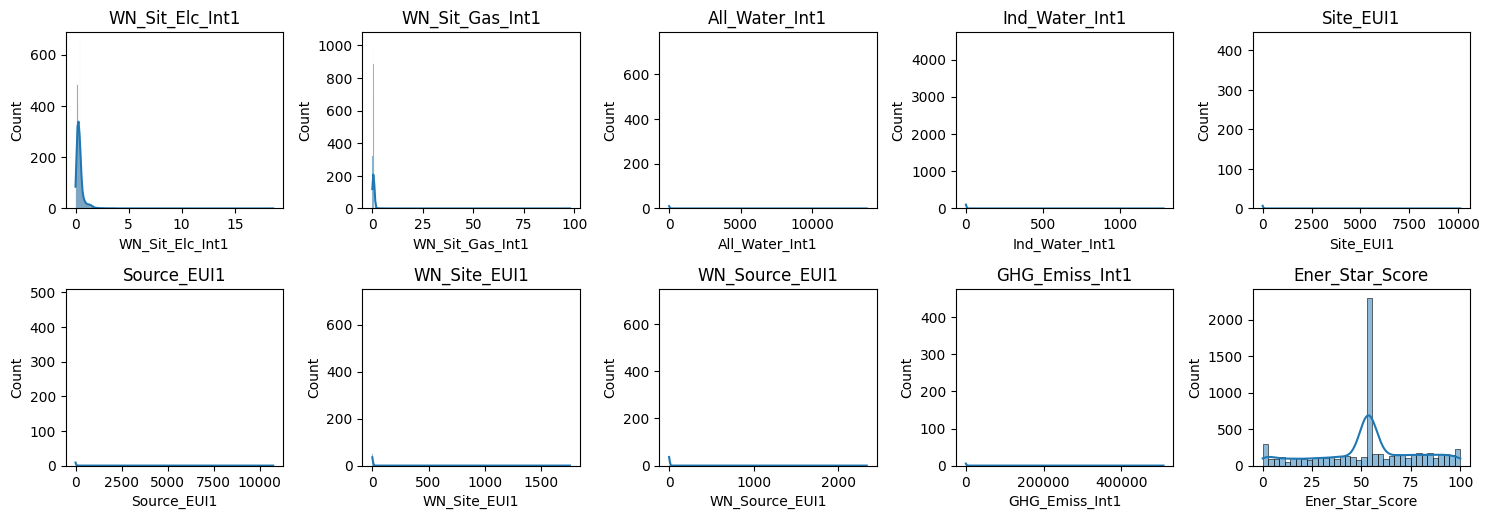

In [ ]:
# prompt: generate the histogram of all numerical attributes

# Assuming df and numeric_attributes are defined as in the provided code.

plt.figure(figsize=(15, 10))  # Adjust figure size as needed
for i, col in enumerate(major_numeric_attributes):
    plt.subplot(4, 5, i + 1)  # Adjust the grid layout if needed
    sns.histplot(df[col], kde=True)  # Include KDE for better visualization
    plt.title(col)
    plt.tight_layout()  # Adjust layout for better spacing

plt.show()

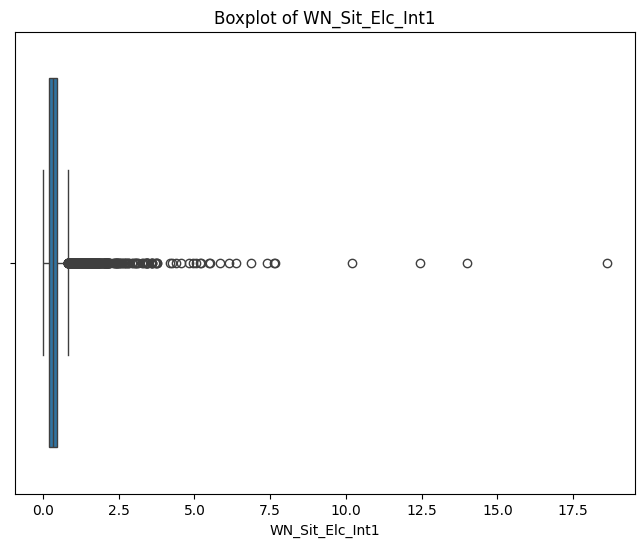

In [ ]:
# prompt: generate the boxplot of WN_Sit_Elc_Int1

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'WN_Sit_Elc_Int1' is a column in it.

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['WN_Sit_Elc_Int1'])
plt.title('Boxplot of WN_Sit_Elc_Int1')
plt.xlabel('WN_Sit_Elc_Int1')
plt.show()

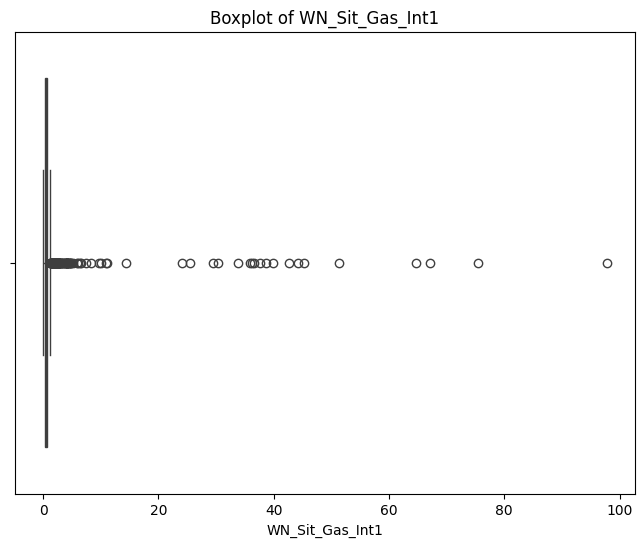

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'WN_Sit_Elc_Int1' is a column in it.

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['WN_Sit_Gas_Int1'])
plt.title('Boxplot of WN_Sit_Gas_Int1')
plt.xlabel('WN_Sit_Gas_Int1')
plt.show()

#1. What are the key drivers of energy efficiency across different property types?

In [37]:
#copy dataframe df into temp1
df_temp_1 = df.copy()
df_temp_1.head()

,EWRB_ID,City,Postal_Code,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,0.259626,6.7,0.340613,9.131721,0.848365,0.188247,...,0.595201,15.360000,0.848239,21.890000,19.375040,1.8,53.424766,Yes,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,0.298376,7.7,0.340613,9.131721,0.848365,0.513402,...,0.667664,17.230000,0.957514,24.710000,20.451431,1.9,11.000000,Yes,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",0.538626,13.9,0.721659,19.347429,1.797435,1.058585,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,Yes,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",0.418501,10.8,0.454151,12.175628,1.131153,0.285631,...,0.823439,21.250000,1.228765,31.710000,23.680604,2.2,74.000000,Yes,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",0.379751,9.8,0.340613,9.131721,0.848365,0.396460,...,0.731214,18.870000,1.099340,28.370000,20.451431,1.9,88.000000,Yes,N,Commercial


In [38]:
df_temp_1.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'All_Prop_Types', 'WN_Sit_Elc_Int1',
       'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2',
       'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1',
       'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1',
       'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1',
       'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score',
       'Data_Qual_Check', 'Calculated with new source factors (Y/N)',
       'Property_Type'],
      dtype='object')

In [39]:
# list of numeric attributes
# From the data dictionary file info:
# ontario_large_building_energy_water_ghgs_data_dictionary.xlsx
numeric_attributes_1 = ['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1',
       'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1',
       'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1',
       'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score']

#list of category attributs
category_attributes_1  = ['All_Prop_Types','Property_Type','Data_Qual_Check', 'Calculated with new source factors (Y/N)']



print("Numeric Attributes:")
print(numeric_attributes_1)
print("Categorical Attributes:")
print(category_attributes_1)


Numeric Attributes:
['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score']
Categorical Attributes:
['All_Prop_Types', 'Property_Type', 'Data_Qual_Check', 'Calculated with new source factors (Y/N)']


In [40]:
# statistical summary of numeric attributes
statistical_summary = df[numeric_attributes_1].describe()
statistical_summary

,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,All_Water_Int2,Ind_Water_Int1,Ind_Water_Int2,Site_EUI1,Site_EUI2,Source_EUI1,Source_EUI2,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000
mean,0.432220,11.154049,0.721659,19.347429,1.797435,7.384968,0.686086,1.414857,1.414857,3.046287,78.613708,3.722794,96.071896,1.530658,39.500776,2.115864,54.602819,127.502949,11.845411,53.424766
std,0.576274,14.871565,2.580018,69.169380,6.426045,214.344317,19.913237,19.386984,19.386984,125.159115,3229.905971,134.529148,3471.712777,28.051603,723.910835,37.340117,963.613929,6377.020709,592.444572,25.011320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197625,5.100000,0.340613,9.131721,0.848365,0.326275,0.030312,0.139891,0.139891,0.611961,15.792500,0.848239,21.890000,0.639376,16.500000,0.884664,22.830000,17.222258,1.600000,42.000000
50%,0.313876,8.100000,0.567689,15.219535,1.413941,0.945311,0.087822,1.414857,1.414857,0.833514,21.510000,1.134021,29.265000,0.874589,22.570000,1.189240,30.690000,25.833387,2.400000,53.424766
75%,0.445626,11.500000,0.721659,19.347429,1.797435,1.675991,0.155705,1.414857,1.414857,1.115518,28.787500,1.546903,39.920000,1.246978,32.180000,1.723410,44.475000,37.673689,3.500000,69.000000
max,18.607788,480.200000,97.756377,2620.814391,243.481609,13788.335021,1280.978158,1280.978158,1280.978158,10113.624400,260996.220000,10720.754840,276664.070000,1756.900339,45339.270000,2339.960780,60385.960000,508441.952202,47235.800000,100.000000


In [41]:
#statistical summary of categorical attribute
categorical_summary = df[category_attributes_1].describe()
categorical_summary

,All_Prop_Types,Property_Type,Data_Qual_Check,Calculated with new source factors (Y/N)
count,6864,6864,6864,6864
unique,353,4,2,2
top,Multifamily Housing,Residential,Yes,N
freq,1497,3386,3634,5279


In [42]:
# Calculate the count and percentage of each property type
property_type_counts = df['Property_Type'].value_counts()
property_type_percentages = (property_type_counts / len(df)) * 100

# Create a DataFrame for the results
property_type_summary = pd.DataFrame({
    'Property Type': property_type_counts.index,
    'Count': property_type_counts.values,
    'Percentage': property_type_percentages.round(2).values
})

# Print the summary
property_type_summary

,Property Type,Count,Percentage
0,Residential,3386,49.33
1,Commercial,2139,31.16
2,Industrial,859,12.51
3,Other,480,6.99


In [43]:
# drop the column city and postal code
# df_temp_1 = df_temp_1.drop(['City', 'Postal_Code','All_Prop_Types'], axis=1)
df_temp_1 = df_temp_1.drop(['City', 'Postal_Code'], axis=1)

In [44]:
df_temp_1.dtypes

,0
EWRB_ID,int64
All_Prop_Types,category
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64
WN_Sit_Gas_Int1,float64
WN_Sit_Gas_Int2,float64
WN_Sit_Gas_Int3,float64
All_Water_Int1,float64
All_Water_Int2,float64
Ind_Water_Int1,float64


In [45]:
df_temp_1.head()

,EWRB_ID,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,All_Water_Int2,Ind_Water_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Property_Type
0,105666,Office,0.259626,6.7,0.340613,9.131721,0.848365,0.188247,0.017489,1.414857,...,0.595201,15.360000,0.848239,21.890000,19.375040,1.8,53.424766,Yes,N,Commercial
1,113606,Non-Refrigerated Warehouse,0.298376,7.7,0.340613,9.131721,0.848365,0.513402,0.047697,0.047697,...,0.667664,17.230000,0.957514,24.710000,20.451431,1.9,11.000000,Yes,N,Industrial
2,125538,"Office , Supermarket/Grocery Store , Parking...",0.538626,13.9,0.721659,19.347429,1.797435,1.058585,0.098346,1.414857,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,Yes,N,Commercial
3,105425,"Data Center , Office, Parking, Other",0.418501,10.8,0.454151,12.175628,1.131153,0.285631,0.026536,1.414857,...,0.823439,21.250000,1.228765,31.710000,23.680604,2.2,74.000000,Yes,N,Commercial
4,105253,"Data Center , Office, Parking, Other",0.379751,9.8,0.340613,9.131721,0.848365,0.396460,0.036832,1.414857,...,0.731214,18.870000,1.099340,28.370000,20.451431,1.9,88.000000,Yes,N,Commercial


In [46]:
# encode each categorical attribute into numerical values so that later Machine Learning algorithms don't have any issues
# Encode categorical attributes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in category_attributes_1:
    df_temp_1[col] = le.fit_transform(df_temp_1[col])

df_temp_1.head()

,EWRB_ID,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,All_Water_Int2,Ind_Water_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Property_Type
0,105666,134,0.259626,6.7,0.340613,9.131721,0.848365,0.188247,0.017489,1.414857,...,0.595201,15.360000,0.848239,21.890000,19.375040,1.8,53.424766,1,0,0
1,113606,126,0.298376,7.7,0.340613,9.131721,0.848365,0.513402,0.047697,0.047697,...,0.667664,17.230000,0.957514,24.710000,20.451431,1.9,11.000000,1,0,1
2,125538,190,0.538626,13.9,0.721659,19.347429,1.797435,1.058585,0.098346,1.414857,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,1,0,0
3,105425,25,0.418501,10.8,0.454151,12.175628,1.131153,0.285631,0.026536,1.414857,...,0.823439,21.250000,1.228765,31.710000,23.680604,2.2,74.000000,1,0,0
4,105253,25,0.379751,9.8,0.340613,9.131721,0.848365,0.396460,0.036832,1.414857,...,0.731214,18.870000,1.099340,28.370000,20.451431,1.9,88.000000,1,0,0


Normalization of Numeric Attributes

In [47]:
#copy dataframe df into temp
df_temp_normalized_1 = df_temp_1.copy()
# Normalize numeric attributes using MinMaxScaler
scaler = MinMaxScaler()
df_temp_normalized_1[numeric_attributes] = scaler.fit_transform(df_temp_normalized_1[numeric_attributes])
#df_temp_normalized.head(15)
#df_temp_normalized.columns
df_temp_normalized_1.dtypes

,0
EWRB_ID,int64
All_Prop_Types,int64
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64
WN_Sit_Gas_Int1,float64
WN_Sit_Gas_Int2,float64
WN_Sit_Gas_Int3,float64
All_Water_Int1,float64
All_Water_Int2,float64
Ind_Water_Int1,float64


In [48]:
df_temp_normalized_1.head(15)

,EWRB_ID,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,All_Water_Int2,Ind_Water_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Property_Type
0,105666,134,0.013953,0.013953,0.003484,0.003484,0.003484,0.000014,0.000014,0.001105,...,0.000339,0.000339,0.000363,0.000363,0.000038,0.000038,0.534248,1,0,0
1,113606,126,0.016035,0.016035,0.003484,0.003484,0.003484,0.000037,0.000037,0.000037,...,0.000380,0.000380,0.000409,0.000409,0.000040,0.000040,0.110000,1,0,1
2,125538,190,0.028946,0.028946,0.007382,0.007382,0.007382,0.000077,0.000077,0.001105,...,0.000871,0.000871,0.000904,0.000904,0.000000,0.000000,0.534248,1,0,0
3,105425,25,0.022491,0.022491,0.004646,0.004646,0.004646,0.000021,0.000021,0.001105,...,0.000469,0.000469,0.000525,0.000525,0.000047,0.000047,0.740000,1,0,0
4,105253,25,0.020408,0.020408,0.003484,0.003484,0.003484,0.000029,0.000029,0.001105,...,0.000416,0.000416,0.000470,0.000470,0.000040,0.000040,0.880000,1,0,0
5,105101,180,0.013120,0.013120,0.003484,0.003484,0.003484,0.000035,0.000035,0.001105,...,0.000433,0.000433,0.000395,0.000395,0.000000,0.000000,0.850000,1,0,0
6,105116,134,0.023228,0.023228,0.007382,0.007382,0.007382,0.000536,0.000536,0.001105,...,0.000871,0.000871,0.000904,0.000904,0.000000,0.000000,0.534248,0,0,0
7,117124,230,0.023228,0.023228,0.003484,0.003484,0.003484,0.000032,0.000032,0.001105,...,0.000871,0.000871,0.000904,0.000904,0.000000,0.000000,0.534248,0,1,0
8,117255,80,0.023228,0.023228,0.006969,0.006969,0.006969,0.000028,0.000028,0.001105,...,0.000871,0.000871,0.000904,0.000904,0.000000,0.000000,0.534248,0,1,0
9,117479,333,0.023228,0.023228,0.004646,0.004646,0.004646,0.000171,0.000171,0.001105,...,0.000871,0.000871,0.000904,0.000904,0.000000,0.000000,0.534248,0,1,0


In [49]:
df_temp_normalized_1.columns

Index(['EWRB_ID', 'All_Prop_Types', 'WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2',
       'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3',
       'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2',
       'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score', 'Data_Qual_Check',
       'Calculated with new source factors (Y/N)', 'Property_Type'],
      dtype='object')

In [50]:
# Calculate correlations for specific columns
selected_columns = ['Property_Type', 'WN_Sit_Elc_Int1', 'WN_Sit_Gas_Int1', 'All_Water_Int1', 'GHG_Emiss_Int1', 'WN_Source_EUI1', 'Ener_Star_Score']
correlation_matrix = df_temp_normalized_1[selected_columns].corr()
# Display the correlation matrix
correlation_matrix

,Property_Type,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,All_Water_Int1,GHG_Emiss_Int1,WN_Source_EUI1,Ener_Star_Score
Property_Type,1.000000,-0.263588,0.002463,-0.021484,-0.011154,-0.024611,-0.058542
WN_Sit_Elc_Int1,-0.263588,1.000000,0.185877,0.006430,0.030296,0.123190,-0.175694
WN_Sit_Gas_Int1,0.002463,0.185877,1.000000,0.000345,0.001073,0.005925,-0.050845
All_Water_Int1,-0.021484,0.006430,0.000345,1.000000,-0.000490,-0.000373,-0.013312
GHG_Emiss_Int1,-0.011154,0.030296,0.001073,-0.000490,1.000000,0.205720,-0.008635
WN_Source_EUI1,-0.024611,0.123190,0.005925,-0.000373,0.205720,1.000000,-0.028516
Ener_Star_Score,-0.058542,-0.175694,-0.050845,-0.013312,-0.008635,-0.028516,1.000000


In [ ]:
# prompt: generate the histogram of all numerical attributes

# Assuming df and numeric_attributes are defined as in the provided code.

# plt.figure(figsize=(15, 10))  # Adjust figure size as needed
# for i, col in enumerate(major_numeric_attributes):
#     plt.subplot(4, 5, i + 1)  # Adjust the grid layout if needed
#     sns.histplot(df_temp_normalized_1[col], kde=True)  # Include KDE for better visualization
#     plt.title(col)
#     plt.tight_layout()  # Adjust layout for better spacing

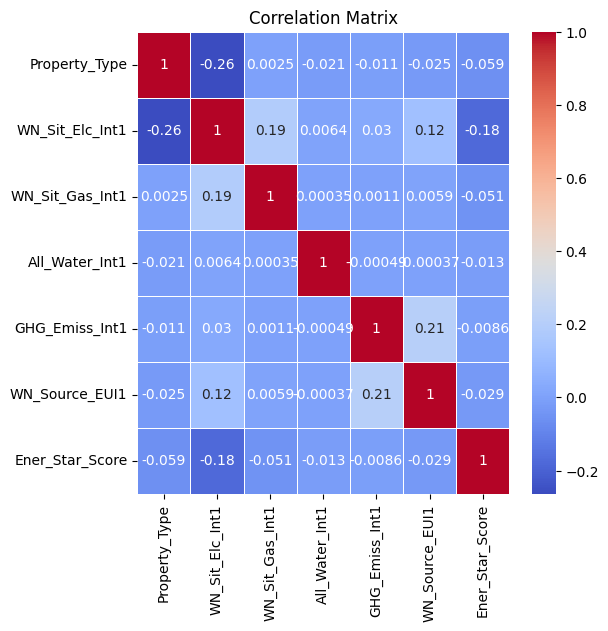

In [51]:
# Plot a heatmap to visualize correlations
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [52]:
df_temp_normalized_1.columns

Index(['EWRB_ID', 'All_Prop_Types', 'WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2',
       'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3',
       'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2',
       'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score', 'Data_Qual_Check',
       'Calculated with new source factors (Y/N)', 'Property_Type'],
      dtype='object')

In [53]:
test_df = df[['All_Prop_Types', 'WN_Sit_Elc_Int1', 'WN_Sit_Gas_Int1', 'All_Water_Int1', 'GHG_Emiss_Int1', 'WN_Source_EUI1','Ener_Star_Score']]
test_df

,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,All_Water_Int1,GHG_Emiss_Int1,WN_Source_EUI1,Ener_Star_Score
0,Office,0.259626,0.340613,0.188247,19.375040,0.848239,53.424766
1,Non-Refrigerated Warehouse,0.298376,0.340613,0.513402,20.451431,0.957514,11.000000
2,"Office , Supermarket/Grocery Store , Parking...",0.538626,0.721659,1.058585,0.000000,2.115864,53.424766
3,"Data Center , Office, Parking, Other",0.418501,0.454151,0.285631,23.680604,1.228765,74.000000
4,"Data Center , Office, Parking, Other",0.379751,0.340613,0.396460,20.451431,1.099340,88.000000
...,...,...,...,...,...,...,...
6859,Retail Store,0.000000,0.721659,1630.160253,18.298649,0.388276,100.000000
6860,"Multifamily Housing, Parking",0.430126,0.227075,1.038619,11.840302,1.019902,67.000000
6861,Office,0.356501,0.681226,0.649901,36.597298,1.383378,59.000000
6862,Office,0.248001,0.340613,0.236735,17.222258,0.797089,95.000000


Decision Tree Model

Mean Squared Error: 0.03886473166038429
Mean Absolute Error: 0.12459236219900423
R² Score: 0.3805970316999012

Feature Importances:
           Feature  Importance
4   GHG_Emiss_Int1    0.296240
0   All_Prop_Types    0.271346
5   WN_Source_EUI1    0.223582
3   All_Water_Int1    0.097197
1  WN_Sit_Elc_Int1    0.094494
2  WN_Sit_Gas_Int1    0.017141


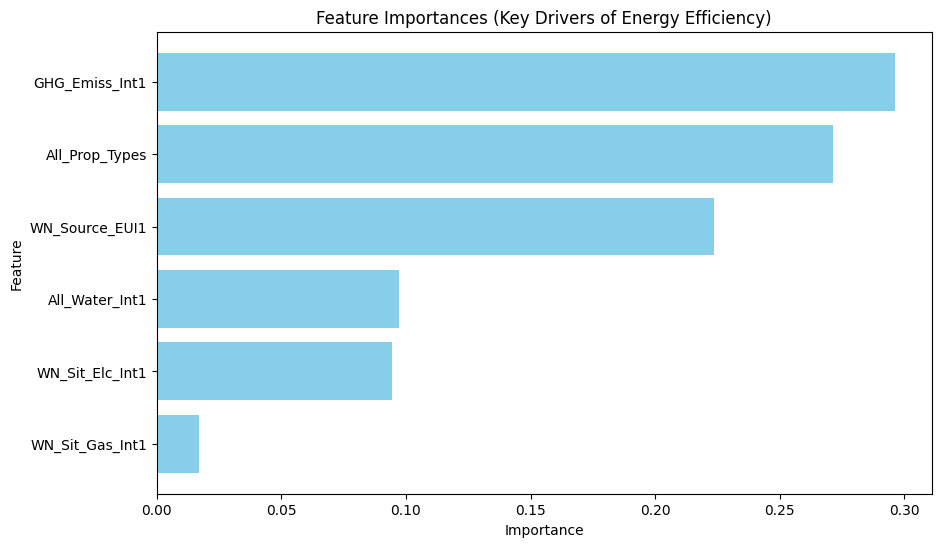


Accuracy: 0.8310269482884195
Precision: 0.8314697754783732
Recall: 0.8310269482884195

Confusion Matrix:
[[314 114]
 [118 827]]


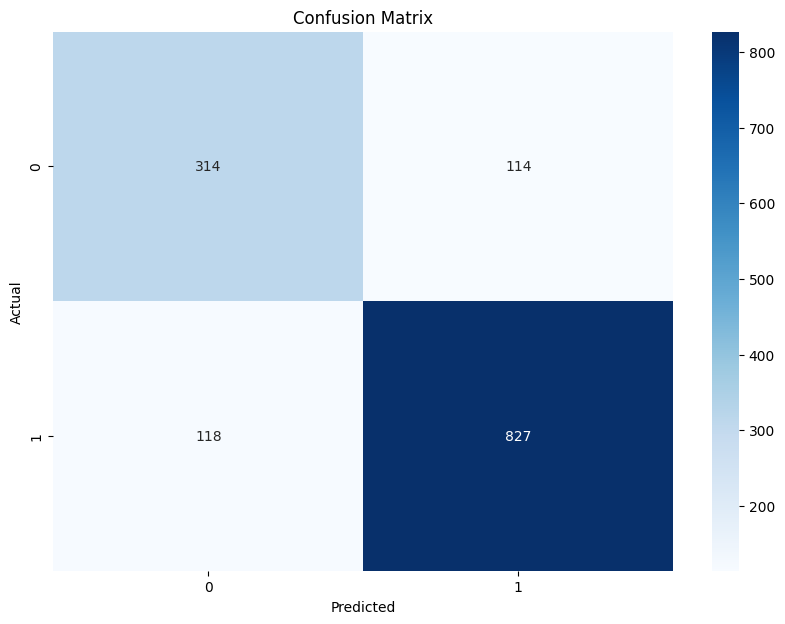

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant features and the target variable
features = ['All_Prop_Types', 'WN_Sit_Elc_Int1', 'WN_Sit_Gas_Int1', 'All_Water_Int1', 'GHG_Emiss_Int1', 'WN_Source_EUI1']
target = 'Ener_Star_Score'

X = df_temp_normalized_1[features]
y = df_temp_normalized_1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Feature importance
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Key Drivers of Energy Efficiency)')
plt.show()

# Convert predictions and actual values to discrete classes
y_pred_class = y_pred.round().astype(int)
y_test_class = y_test.round().astype(int)

# Calculate accuracy, precision, and recall for each model
accuracy_dt = accuracy_score(y_test_class, y_pred_class)
precision_dt = precision_score(y_test_class, y_pred_class, average='weighted')
recall_dt = recall_score(y_test_class, y_pred_class, average='weighted')
print()
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print()
# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print('Confusion Matrix:')
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

RandomForest Model

Mean Squared Error: 0.022515672811904603
Mean Absolute Error: 0.10441056617111524
R² Score: 0.6411586037738348

Feature Importances:
           Feature  Importance
4   GHG_Emiss_Int1    0.273027
5   WN_Source_EUI1    0.255368
0   All_Prop_Types    0.243588
3   All_Water_Int1    0.110176
1  WN_Sit_Elc_Int1    0.099692
2  WN_Sit_Gas_Int1    0.018148


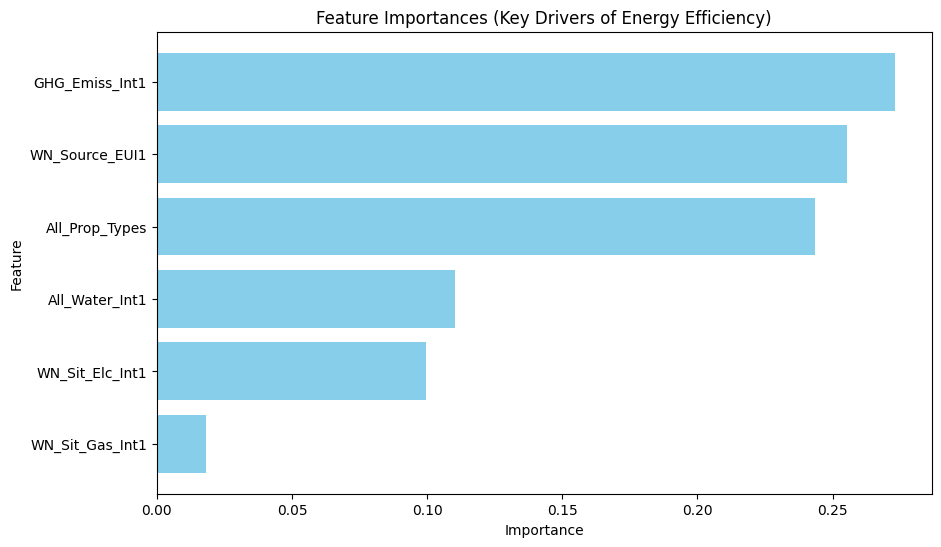

Accuracy: 0.8404952658412236
Precision: 0.8523437360064744
Recall: 0.8404952658412236

Confusion Matrix:
[[357  71]
 [148 797]]


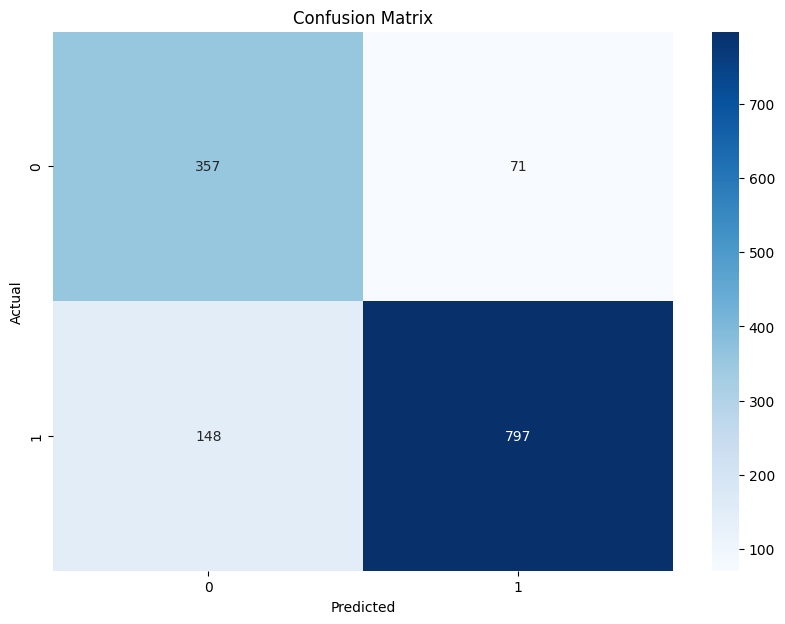

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay , accuracy_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant features and the target variable
features = ['All_Prop_Types', 'WN_Sit_Elc_Int1', 'WN_Sit_Gas_Int1', 'All_Water_Int1', 'GHG_Emiss_Int1', 'WN_Source_EUI1']
target = 'Ener_Star_Score'

X = df_temp_normalized_1[features]
y = df_temp_normalized_1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=100)  # You can adjust n_estimators as needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Feature importance
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Key Drivers of Energy Efficiency)')
plt.show()

# Convert predictions and actual values to discrete classes
y_pred_class = y_pred.round().astype(int)
y_test_class = y_test.round().astype(int)

# Calculate accuracy, precision, and recall for each model
accuracy_dt = accuracy_score(y_test_class, y_pred_class)
precision_dt = precision_score(y_test_class, y_pred_class, average='weighted')
recall_dt = recall_score(y_test_class, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print()

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print('Confusion Matrix:')
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#How do greenhouse gas (GHG) emissions vary by location and property type?

In [56]:
#copy dataframe df into temp1
df_temp_2 = df.copy()
df_temp_2.head()

,EWRB_ID,City,Postal_Code,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,0.259626,6.7,0.340613,9.131721,0.848365,0.188247,...,0.595201,15.360000,0.848239,21.890000,19.375040,1.8,53.424766,Yes,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,0.298376,7.7,0.340613,9.131721,0.848365,0.513402,...,0.667664,17.230000,0.957514,24.710000,20.451431,1.9,11.000000,Yes,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",0.538626,13.9,0.721659,19.347429,1.797435,1.058585,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,Yes,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",0.418501,10.8,0.454151,12.175628,1.131153,0.285631,...,0.823439,21.250000,1.228765,31.710000,23.680604,2.2,74.000000,Yes,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",0.379751,9.8,0.340613,9.131721,0.848365,0.396460,...,0.731214,18.870000,1.099340,28.370000,20.451431,1.9,88.000000,Yes,N,Commercial


In [57]:
df_temp_2.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'All_Prop_Types', 'WN_Sit_Elc_Int1',
       'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2',
       'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1',
       'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1',
       'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1',
       'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score',
       'Data_Qual_Check', 'Calculated with new source factors (Y/N)',
       'Property_Type'],
      dtype='object')

In [58]:
df_temp_2.dtypes

,0
EWRB_ID,int64
City,object
Postal_Code,object
All_Prop_Types,category
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64
WN_Sit_Gas_Int1,float64
WN_Sit_Gas_Int2,float64
WN_Sit_Gas_Int3,float64
All_Water_Int1,float64


In [59]:
# List of columns to convert from Object into category
# Convert specified columns to cagegory
df_temp_2[['City','Postal_Code']] = df_temp_2[['City','Postal_Code']].astype('category')

In [60]:
df_temp_2.dtypes

,0
EWRB_ID,int64
City,category
Postal_Code,category
All_Prop_Types,category
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64
WN_Sit_Gas_Int1,float64
WN_Sit_Gas_Int2,float64
WN_Sit_Gas_Int3,float64
All_Water_Int1,float64


In [61]:
# list of numeric attributes

numeric_attributes_2 = ['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1',
       'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1',
       'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1',
       'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score']

#list of category attributs
category_attributes_2  = ['City','Postal_Code','All_Prop_Types','Property_Type','Data_Qual_Check', 'Calculated with new source factors (Y/N)']


print("Numeric Attributes:")
print(numeric_attributes)
print("Categorical Attributes:")
print(category_attributes)


Numeric Attributes:
['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score']
Categorical Attributes:
['All_Prop_Types', 'Property_Type', 'Data_Qual_Check', 'Calculated with new source factors (Y/N)']


In [62]:
# check the missing values in each column
df_temp_2.isnull().sum()



,0
EWRB_ID,0
City,0
Postal_Code,0
All_Prop_Types,0
WN_Sit_Elc_Int1,0
WN_Sit_Elc_Int2,0
WN_Sit_Gas_Int1,0
WN_Sit_Gas_Int2,0
WN_Sit_Gas_Int3,0
All_Water_Int1,0


In [63]:
# statistical summary of numeric attributes
statistical_summary = df_temp_2[numeric_attributes_2].describe()
statistical_summary



,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,All_Water_Int2,Ind_Water_Int1,Ind_Water_Int2,Site_EUI1,Site_EUI2,Source_EUI1,Source_EUI2,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000
mean,0.432220,11.154049,0.721659,19.347429,1.797435,7.384968,0.686086,1.414857,1.414857,3.046287,78.613708,3.722794,96.071896,1.530658,39.500776,2.115864,54.602819,127.502949,11.845411,53.424766
std,0.576274,14.871565,2.580018,69.169380,6.426045,214.344317,19.913237,19.386984,19.386984,125.159115,3229.905971,134.529148,3471.712777,28.051603,723.910835,37.340117,963.613929,6377.020709,592.444572,25.011320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197625,5.100000,0.340613,9.131721,0.848365,0.326275,0.030312,0.139891,0.139891,0.611961,15.792500,0.848239,21.890000,0.639376,16.500000,0.884664,22.830000,17.222258,1.600000,42.000000
50%,0.313876,8.100000,0.567689,15.219535,1.413941,0.945311,0.087822,1.414857,1.414857,0.833514,21.510000,1.134021,29.265000,0.874589,22.570000,1.189240,30.690000,25.833387,2.400000,53.424766
75%,0.445626,11.500000,0.721659,19.347429,1.797435,1.675991,0.155705,1.414857,1.414857,1.115518,28.787500,1.546903,39.920000,1.246978,32.180000,1.723410,44.475000,37.673689,3.500000,69.000000
max,18.607788,480.200000,97.756377,2620.814391,243.481609,13788.335021,1280.978158,1280.978158,1280.978158,10113.624400,260996.220000,10720.754840,276664.070000,1756.900339,45339.270000,2339.960780,60385.960000,508441.952202,47235.800000,100.000000


In [ ]:
#statistical summary of categorical attribute
categorical_summary = df_temp_2[category_attributes_2].describe()
categorical_summary



,City,Postal_Code,All_Prop_Types,Property_Type,Data_Qual_Check,Calculated with new source factors (Y/N)
count,6864,6864,6864,6864,6864,6864
unique,316,490,353,4,2,2
top,Toronto,M5V,Multifamily Housing,Residential,Yes,N
freq,1798,121,1497,3386,3634,5279


In [64]:
df_city_ghg = df_temp_2[['City', 'Property_Type','GHG_Emiss_Int1']]
df_city_ghg

,City,Property_Type,GHG_Emiss_Int1
0,Toronto,Commercial,19.375040
1,Bolton,Industrial,20.451431
2,Toronto,Commercial,0.000000
3,Toronto,Commercial,23.680604
4,Toronto,Commercial,20.451431
...,...,...,...
6859,Stittsville,Commercial,18.298649
6860,Ottawa,Residential,11.840302
6861,Toronto,Commercial,36.597298
6862,Toronto,Commercial,17.222258


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# GHG Emissions by Location and Property Type
ghg_by_location_property = df_temp_2.groupby(['City', 'Property_Type'])[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']].mean().reset_index()
# print(ghg_by_location_property)
ghg_by_location_property

<ipython-input-65-11a357bc42e0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ghg_by_location_property = df_temp_2.groupby(['City', 'Property_Type'])[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']].mean().reset_index()


,City,Property_Type,GHG_Emiss_Int1,GHG_Emiss_Int2
0,121 Pippin Road,Commercial,NaN,NaN
1,121 Pippin Road,Industrial,55.972338,5.2
2,121 Pippin Road,Other,NaN,NaN
3,121 Pippin Road,Residential,NaN,NaN
4,90 Sheppard Ave East,Commercial,19.375040,1.8
...,...,...,...,...
1259,scarborough,Residential,4.305564,0.4
1260,toronto,Commercial,158.229493,14.7
1261,toronto,Industrial,NaN,NaN
1262,toronto,Other,NaN,NaN


In [ ]:
# # Visualizing GHG Emissions by Property Type
# plt.figure(figsize=(12, 6))
# sns.barplot(
#     data=ghg_by_location_property,
#     x='Property_Type',
#     y='GHG_Emiss_Int1',
#     hue='City'
# )
# plt.title('GHG Emissions by Location and Property Type')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [66]:
# Calculate the mean GHG emissions for each city
average_ghg_by_city = df_temp_2.groupby('City')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']].mean().reset_index()

# Display the results
print(average_ghg_by_city)

                     City  GHG_Emiss_Int1  GHG_Emiss_Int2
0         121 Pippin Road       55.972338        5.200000
1    90 Sheppard Ave East       19.375040        1.800000
2                    AJAX       30.784786        2.860000
3             AMHERSTBURG       15.607671        1.450000
4                   Acton       46.284818        4.300000
..                    ...             ...             ...
311              oakville       24.756996        2.300000
312                ottawa       26.192184        2.433333
313         richmond hill        0.000000        0.000000
314           scarborough        4.305564        0.400000
315               toronto       46.284818        4.300000

[316 rows x 3 columns]


<ipython-input-66-de431cbb3aee>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ghg_by_city = df_temp_2.groupby('City')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']].mean().reset_index()


In [67]:
# Select the top 10 cities with the highest average GHG emissions (GHG_Emiss_Int1)
top_10_cities = average_ghg_by_city.nlargest(10, 'GHG_Emiss_Int1')
print(top_10_cities)



               City  GHG_Emiss_Int1  GHG_Emiss_Int2
37       Brockville    36343.346342     3376.407143
254       St. Marys      523.126080       48.600000
222         Ruthven      425.174489       39.500000
176  Norfolk County      247.569955       23.000000
283         VAUGHAN      139.123551       12.925000
276         Toronto      111.665101       10.374027
23        BURLINTON       95.798809        8.900000
39       Burlington       86.320852        8.019469
244      Smithville       80.011739        7.433333
285         Vaughan       76.339014        7.092126


In [68]:
# Select the top 10 property types with the highest average GHG emissions (GHG_Emiss_Int1)
top_10_property_types = (
    df_temp_2.groupby('All_Prop_Types')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]
    .mean()
    .nlargest(10, 'GHG_Emiss_Int1')
    .reset_index()
)
# print(top_10_property_types)
top_10_property_types




<ipython-input-68-c957a2bc0158>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_2.groupby('All_Prop_Types')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]


,All_Prop_Types,GHG_Emiss_Int1,GHG_Emiss_Int2
0,"Office , Food Service , Social/Meeting Hall ...",143687.449349,13349.0000
1,Manufacturing/Industrial Plant,1290.079506,119.8523
2,Lifestyle Center,173.298969,16.1000
3,"Office , Non-Refrigerated Warehouse",143.160018,13.3000
4,"Data Center , Office , Manufacturing/Industr...",132.396107,12.3000
5,"Restaurant , Office , Financial Office, Othe...",132.396107,12.3000
6,"Personal Services , Veterinary Office , Ma...",127.014151,11.8000
7,Parking,118.403022,11.0000
8,"Laboratory , Parking",111.406480,10.3500
9,"Distribution Center , Office , Non-Refrigera...",81.805724,7.6000


<ipython-input-69-cf89880938de>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_2.groupby('Property_Type')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]


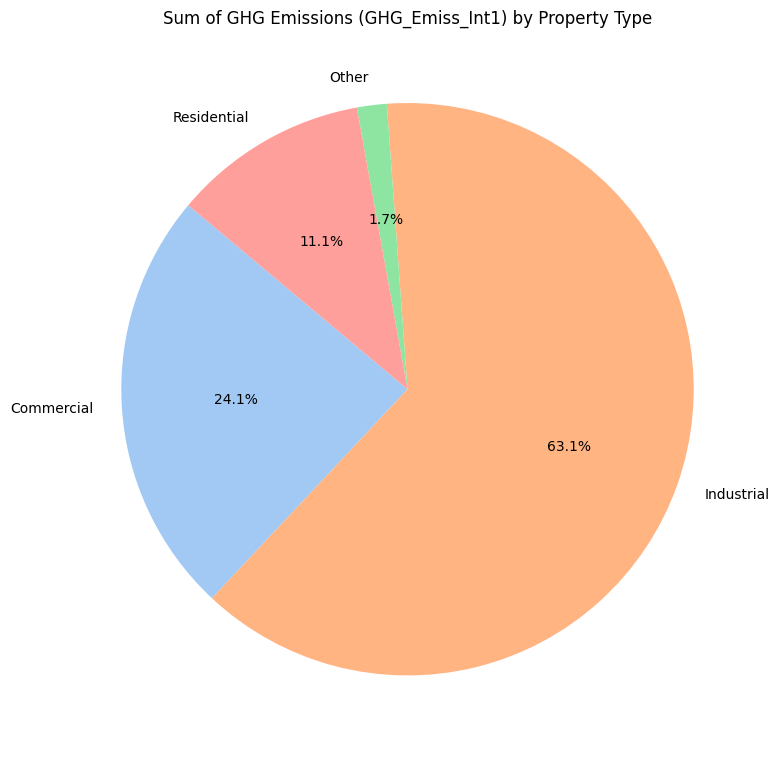

In [69]:
# Summing up GHG emissions for each building type
ghg_sum_by_building_type = (
    df_temp_2.groupby('Property_Type')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]
    .sum()
    .reset_index()
)

# Visualization: Pie chart for sum of GHG emissions by building type
plt.figure(figsize=(8, 8))
plt.pie(
    ghg_sum_by_building_type['GHG_Emiss_Int1'],
    labels=ghg_sum_by_building_type['Property_Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')[0:len(ghg_sum_by_building_type)]
)
plt.title('Sum of GHG Emissions (GHG_Emiss_Int1) by Property Type')
plt.tight_layout()
plt.show()



<ipython-input-70-baca9a7ac20f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_2.groupby('City')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]


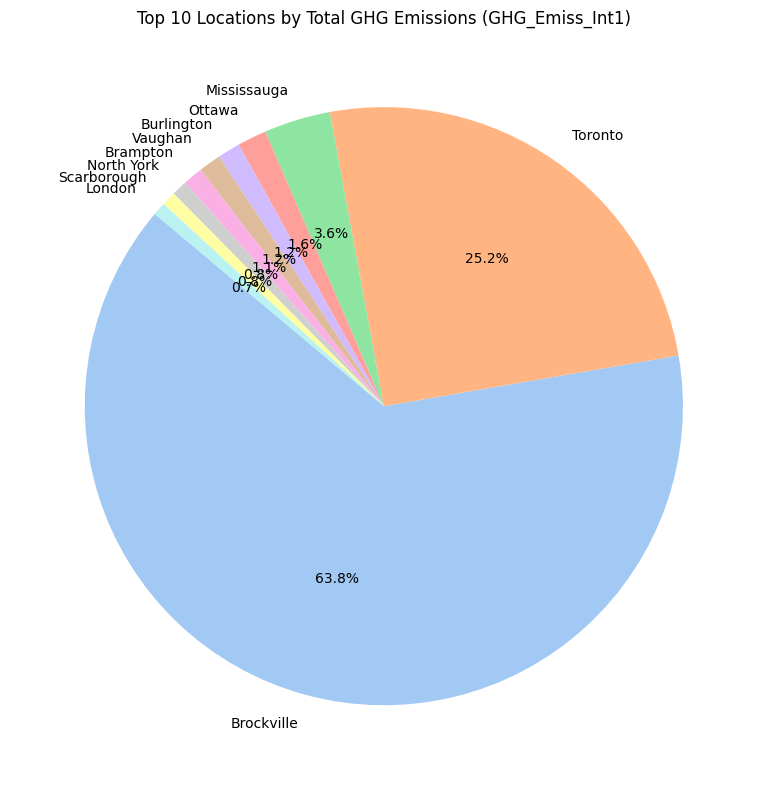

In [70]:
import matplotlib.pyplot as plt

# Aggregate total GHG emissions by city
total_ghg_by_city = (
    df_temp_2.groupby('City')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]
    .sum()
    .reset_index()
)

# Select top 10 cities based on total GHG emissions (GHG_Emiss_Int1)
top_10_cities_ghg = total_ghg_by_city.nlargest(10, 'GHG_Emiss_Int1')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_10_cities_ghg['GHG_Emiss_Int1'],
    labels=top_10_cities_ghg['City'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')[:10]
)
plt.title('Top 10 Locations by Total GHG Emissions (GHG_Emiss_Int1)')
plt.tight_layout()
plt.show()

In [71]:
# Aggregate total GHG emissions by city
total_ghg_by_city = (
    df_temp_2.groupby('City')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]
    .sum()
    .reset_index()
)

# Select the top 10 cities based on total GHG emissions (GHG_Emiss_Int1)
top_10_cities_ghg = total_ghg_by_city.nlargest(10, 'GHG_Emiss_Int1')

# Extract and print the names of the top 10 cities
top_10_city_names = top_10_cities_ghg['City'].tolist()
print("Top 10 Cities by Total GHG Emissions (GHG_Emiss_Int1):")
print(top_10_city_names)



Top 10 Cities by Total GHG Emissions (GHG_Emiss_Int1):
['Brockville', 'Toronto', 'Mississauga', 'Ottawa', 'Burlington', 'Vaughan', 'Brampton', 'North York', 'Scarborough', 'London']


<ipython-input-71-1f81ebfbd82a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_2.groupby('City')[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]


In [72]:
# show only the City, All_Prop_Types, Property_Type and GHG_Emiss_Int1, GhG_Emiss_Int2 of the city Broackville only and display in descending order by GHG_Emiss_int1

# Filter data for Brockville and select specific columns
brockville_data = df_temp_2[df_temp_2['City'] == 'Brockville'][['City', 'All_Prop_Types',  'GHG_Emiss_Int1']]

# Sort the data in descending order by GHG_Emiss_Int1
brockville_data_sorted = brockville_data.sort_values('GHG_Emiss_Int1', ascending=False)

# Display the sorted data
brockville_data_sorted

,City,All_Prop_Types,GHG_Emiss_Int1
2525,Brockville,Manufacturing/Industrial Plant,508441.952202
157,Brockville,Manufacturing/Industrial Plant,144.236409
929,Brockville,Other - Mall,49.513991
690,Brockville,Strip Mall,32.291733
155,Brockville,"Parking , Wholesale Club/Supercenter",29.062560
1617,Brockville,"Restaurant , Multifamily Housing, Parking ,...",25.833387
1873,Brockville,Retail Store,24.756996
2813,Brockville,Retail Store,19.375040
5105,Brockville,"Multifamily Housing , Office, Parking",19.375040
4806,Brockville,"Multifamily Housing, Parking",6.458347


In [73]:
#show the entire record from the dataset which has index 2525

df_temp_2.iloc[2525]

,2525
EWRB_ID,101956
City,Brockville
Postal_Code,K6V
All_Prop_Types,Manufacturing/Industrial Plant
WN_Sit_Elc_Int1,0.406876
WN_Sit_Elc_Int2,10.5
WN_Sit_Gas_Int1,0.721659
WN_Sit_Gas_Int2,19.347429
WN_Sit_Gas_Int3,1.797435
All_Water_Int1,0.100236


<ipython-input-74-5ed8233880dc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_2.groupby(['City', 'Property_Type'])[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]
<ipython-input-74-5ed8233880dc>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_ghg_by_city = ghg_by_city_property_type.groupby('City')[['GHG_Emiss_Int1']].sum().reset_index()


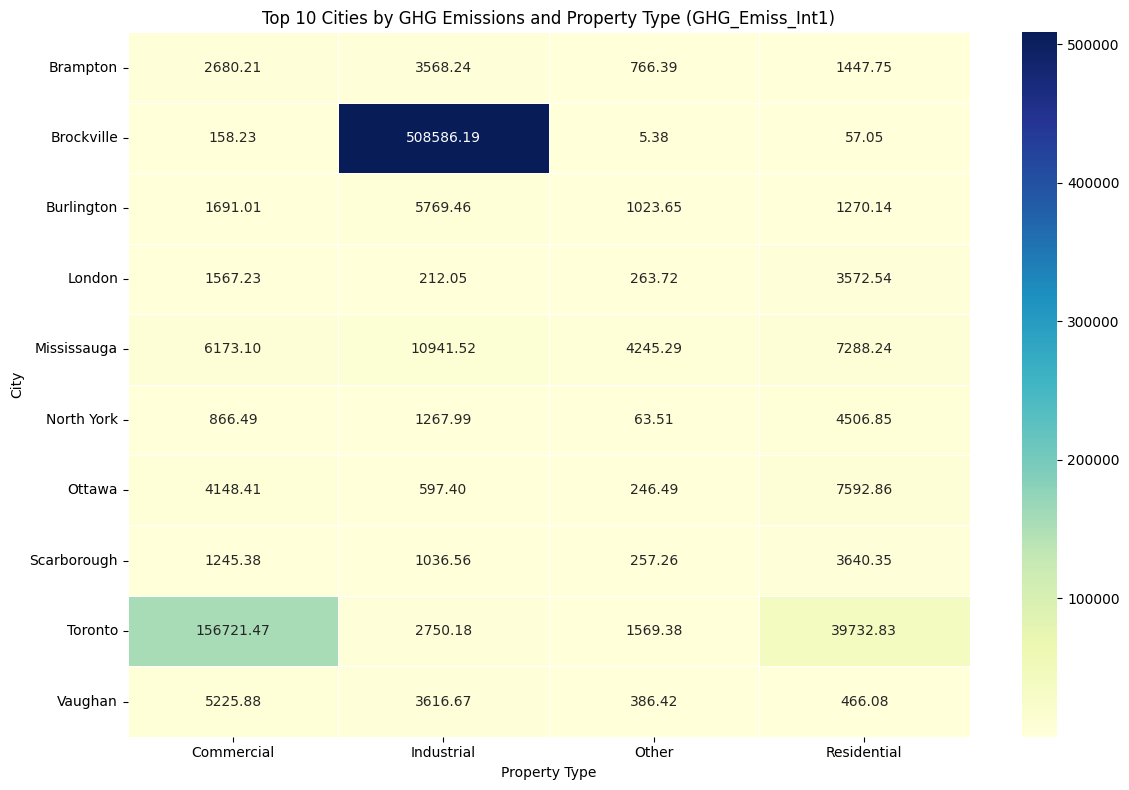

In [74]:
# Grouping the data by 'City' and 'Property_Type', summing up GHG emissions
ghg_by_city_property_type = (
    df_temp_2.groupby(['City', 'Property_Type'])[['GHG_Emiss_Int1', 'GHG_Emiss_Int2']]
    .sum()
    .reset_index()
)

# Calculate the total GHG emissions by city (sum of GHG_Emiss_Int1)
total_ghg_by_city = ghg_by_city_property_type.groupby('City')[['GHG_Emiss_Int1']].sum().reset_index()

# Select the top 10 cities based on total GHG emissions (GHG_Emiss_Int1)
top_10_cities = total_ghg_by_city.nlargest(10, 'GHG_Emiss_Int1')['City']

# Filter the original data to include only the top 10 cities
ghg_by_top_10_cities = ghg_by_city_property_type[ghg_by_city_property_type['City'].isin(top_10_cities)]

# Pivot table for the top 10 cities and GHG emissions by property type
pivot_table_top_10 = ghg_by_top_10_cities.pivot(index='City', columns='Property_Type', values='GHG_Emiss_Int1')

# Create a heatmap to visualize the GHG emissions by city and property type for the top 10 cities
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top_10, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=0.5)
plt.title('Top 10 Cities by GHG Emissions and Property Type (GHG_Emiss_Int1)')
plt.xlabel('Property Type')
plt.ylabel('City')
plt.tight_layout()
plt.show()

<ipython-input-76-c06874486e53>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_2.groupby(['City', 'Property_Type'])[['GHG_Emiss_Int1']]


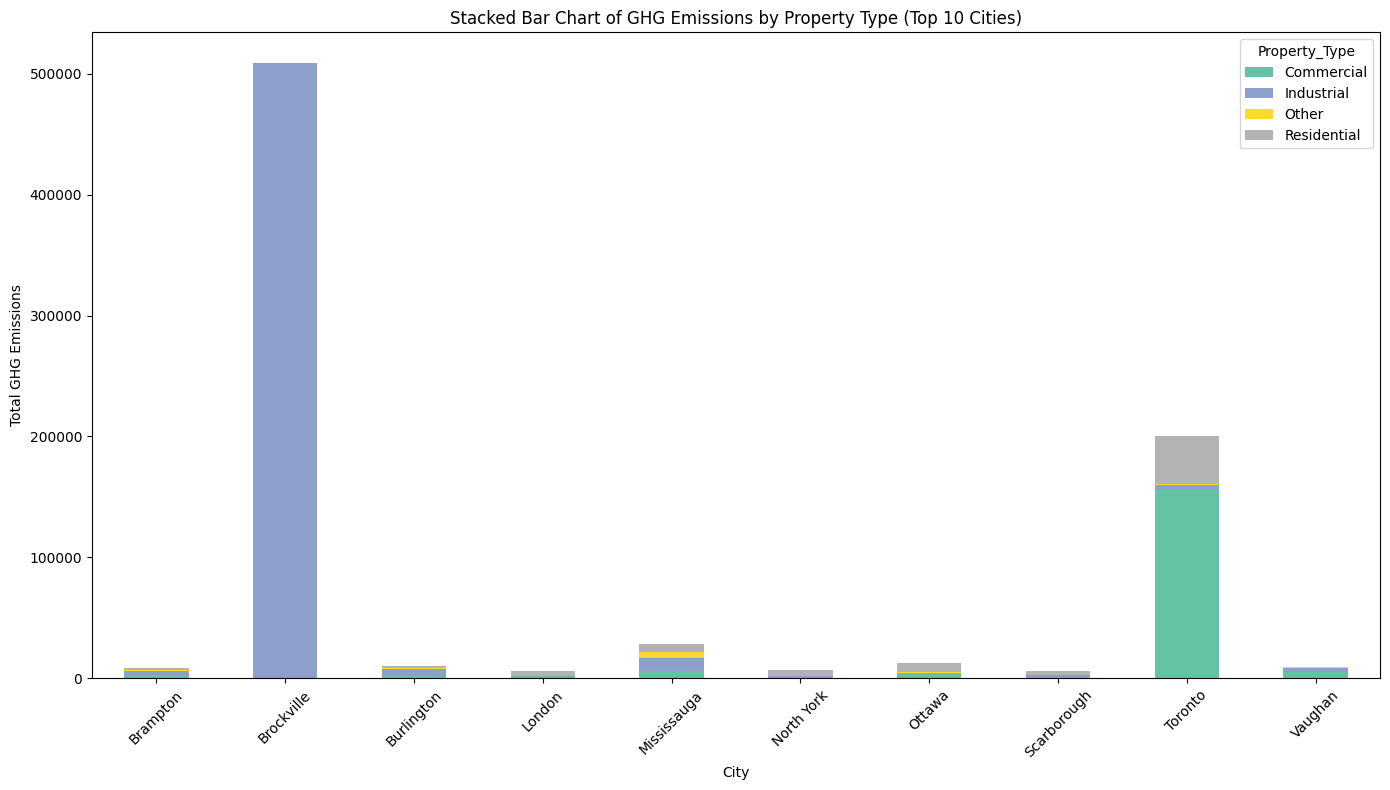

In [76]:
# Aggregate the data by 'City' and 'Property_Type' for total GHG emissions
ghg_by_city_property_type = (
    df_temp_2.groupby(['City', 'Property_Type'])[['GHG_Emiss_Int1']]
    .sum()
    .reset_index()
)

# Filter for the top 10 cities
ghg_by_top_10_cities = ghg_by_city_property_type[ghg_by_city_property_type['City'].isin(top_10_cities)]

# Pivot the data for stacked bar chart
pivot_ghg_by_property_type = ghg_by_top_10_cities.pivot(index='City', columns='Property_Type', values='GHG_Emiss_Int1')

# Stacked bar chart for GHG emissions by property type for each of the top 10 cities
pivot_ghg_by_property_type.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Stacked Bar Chart of GHG Emissions by Property Type (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Total GHG Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

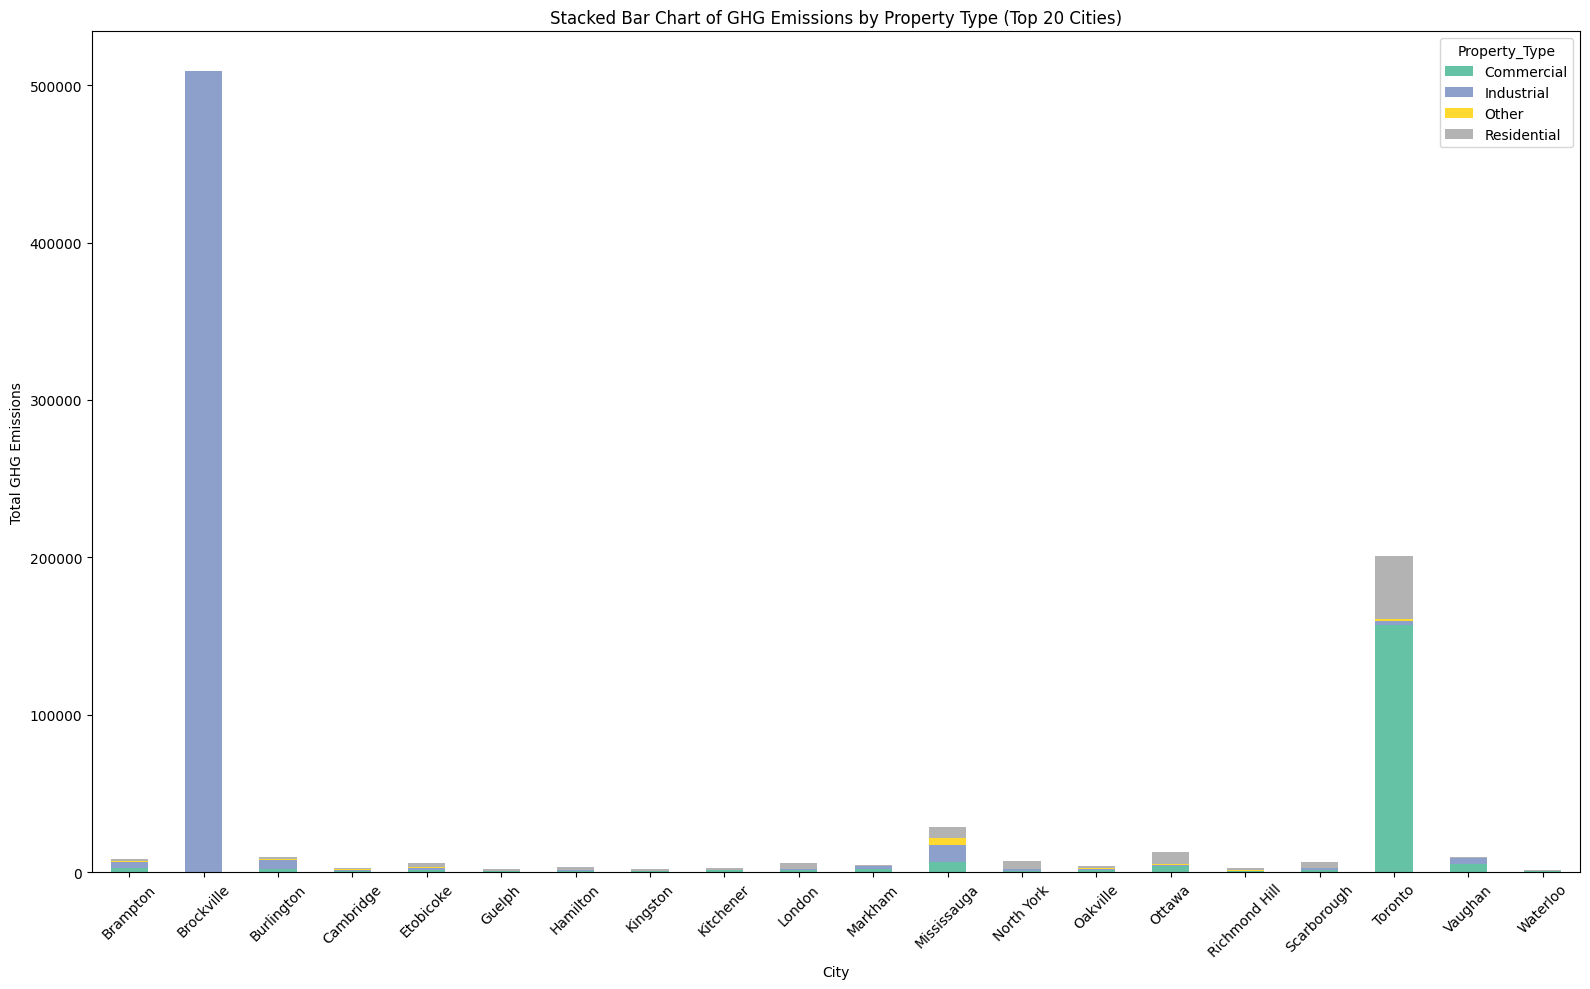

In [77]:
# Sort by GHG emissions and select the top 20 cities
top_20_cities = total_ghg_by_city.sort_values('GHG_Emiss_Int1', ascending=False).head(20)['City']

# Filter the data for top 20 cities
ghg_by_top_20_cities = ghg_by_city_property_type[ghg_by_city_property_type['City'].isin(top_20_cities)]

# Pivot the data for stacked bar chart
pivot_ghg_by_property_type = ghg_by_top_20_cities.pivot(index='City', columns='Property_Type', values='GHG_Emiss_Int1')

# Stacked bar chart for GHG emissions by property type for each of the top 20 cities
pivot_ghg_by_property_type.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='Set2')
plt.title('Stacked Bar Chart of GHG Emissions by Property Type (Top 20 Cities)')
plt.xlabel('City')
plt.ylabel('Total GHG Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#What is the relationship between water usage and energy consumption in large buildings?

In [78]:
#copy dataframe df into temp1
df_temp_3 = df.copy()
df_temp_3.head()

,EWRB_ID,City,Postal_Code,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,0.259626,6.7,0.340613,9.131721,0.848365,0.188247,...,0.595201,15.360000,0.848239,21.890000,19.375040,1.8,53.424766,Yes,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,0.298376,7.7,0.340613,9.131721,0.848365,0.513402,...,0.667664,17.230000,0.957514,24.710000,20.451431,1.9,11.000000,Yes,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",0.538626,13.9,0.721659,19.347429,1.797435,1.058585,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,Yes,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",0.418501,10.8,0.454151,12.175628,1.131153,0.285631,...,0.823439,21.250000,1.228765,31.710000,23.680604,2.2,74.000000,Yes,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",0.379751,9.8,0.340613,9.131721,0.848365,0.396460,...,0.731214,18.870000,1.099340,28.370000,20.451431,1.9,88.000000,Yes,N,Commercial


In [79]:
df_temp_3.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'All_Prop_Types', 'WN_Sit_Elc_Int1',
       'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2',
       'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1',
       'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1',
       'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1',
       'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score',
       'Data_Qual_Check', 'Calculated with new source factors (Y/N)',
       'Property_Type'],
      dtype='object')

In [80]:
# list of numeric attributes

numeric_attributes_3 = ['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1',
       'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1',
       'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1',
       'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score']

#list of category attributs
category_attributes_3  = ['City','Postal_Code','All_Prop_Types','Property_Type','Data_Qual_Check', 'Calculated with new source factors (Y/N)']


print("Numeric Attributes:")
print(numeric_attributes_3)
print("Categorical Attributes:")
print(category_attributes_3)

Numeric Attributes:
['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score']
Categorical Attributes:
['City', 'Postal_Code', 'All_Prop_Types', 'Property_Type', 'Data_Qual_Check', 'Calculated with new source factors (Y/N)']


In [81]:
#copy dataframe df into temp
df_temp_normalized_3 = df_temp_3.copy()
# Normalize numeric attributes using MinMaxScaler
scaler = MinMaxScaler()
df_temp_normalized_1[numeric_attributes_3] = scaler.fit_transform(df_temp_normalized_3[numeric_attributes_3])
#df_temp_normalized.head(15)
#df_temp_normalized.columns
df_temp_normalized_3.dtypes

,0
EWRB_ID,int64
City,object
Postal_Code,object
All_Prop_Types,category
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64
WN_Sit_Gas_Int1,float64
WN_Sit_Gas_Int2,float64
WN_Sit_Gas_Int3,float64
All_Water_Int1,float64


In [82]:
df_temp_normalized_3.head(15)

,EWRB_ID,City,Postal_Code,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,0.259626,6.700000,0.340613,9.131721,0.848365,0.188247,...,0.595201,15.360000,0.848239,21.890000,19.375040,1.8,53.424766,Yes,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,0.298376,7.700000,0.340613,9.131721,0.848365,0.513402,...,0.667664,17.230000,0.957514,24.710000,20.451431,1.9,11.000000,Yes,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",0.538626,13.900000,0.721659,19.347429,1.797435,1.058585,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,Yes,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",0.418501,10.800000,0.454151,12.175628,1.131153,0.285631,...,0.823439,21.250000,1.228765,31.710000,23.680604,2.2,74.000000,Yes,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",0.379751,9.800000,0.340613,9.131721,0.848365,0.396460,...,0.731214,18.870000,1.099340,28.370000,20.451431,1.9,88.000000,Yes,N,Commercial
5,105101,Toronto,M5N,"Office , Other",0.244126,6.300000,0.340613,9.131721,0.848365,0.478360,...,0.761052,19.640000,0.924577,23.860000,0.000000,0.0,85.000000,Yes,N,Commercial
6,105116,Toronto,M5J,Office,0.432220,11.154049,0.721659,19.347429,1.797435,7.384968,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,No,N,Commercial
7,117124,Kitchener,N2A,"Parking , Enclosed Mall",0.432220,11.154049,0.340613,9.131721,0.848365,0.440873,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,No,Y,Commercial
8,117255,Kitchener,N2C,"Lifestyle Center , Parking",0.432220,11.154049,0.681226,18.263443,1.696729,0.385459,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,No,Y,Commercial
9,117479,Waterloo,N2J,"Strip Mall , Parking",0.432220,11.154049,0.454151,12.175628,1.131153,2.355535,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,No,Y,Commercial


In [83]:
# Summary statistics for energy consumption (WN_Source_EUI1) and water usage (All_Water_Int1) by building type
# summary_stats = df_temp_3.groupby('Property_Type')[['WN_Source_EUI1', 'All_Water_Int1']].describe()
summary_stats = df_temp_normalized_3.groupby('Property_Type')[['WN_Source_EUI1', 'All_Water_Int1']].describe()
# print(summary_stats)
summary_stats

<ipython-input-83-a7a693a8f131>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_temp_normalized_3.groupby('Property_Type')[['WN_Source_EUI1', 'All_Water_Int1']].describe()


WN_Source_EUI1                                           \
                       count      mean        std       min       25%   
Property_Type                                                           
Commercial            2139.0  2.919700  50.603421  0.000000  1.062915   
Industrial             859.0  4.210147  68.989762  0.018213  0.755239   
Other                  480.0  1.502858   1.427811  0.000000  0.734120   
Residential           3386.0  1.163662   0.565093  0.010075  0.858702   

                                               All_Water_Int1             \
                    50%       75%          max          count       mean   
Property_Type                                                              
Commercial     1.501566  2.115864  2339.960780         2139.0  11.765944   
Industrial     1.172190  2.115864  2022.539500          859.0  17.516994   
Other          1.136927  1.975382    14.432467          480.0   0.889560   
Residential    1.089846  1.356737    15.133069         3386.0   2.967803   

                                                                            
                      std  min       25%       50%       75%           max  
Property_Type                                                               
Commercial     236.287746  0.0  0.225326  0.427020  0.893767   6822.584670  
Industrial     470.482710  0.0  0.118571  0.243662  0.525422  13788.335021  
Other            1.704290  0.0  0.142815  0.296632  0.696759     11.251235  
Residential     41.404039  0.0  1.029044  1.454026  2.056764   1976.372161

In [84]:
# Calculate the correlation between energy consumption (WN_Source_EUI1) and water usage (All_Water_Int1)
# correlation = df_temp_3[['WN_Source_EUI1', 'All_Water_Int1']].corr()
correlation = df_temp_normalized_3[['WN_Source_EUI1', 'All_Water_Int1']].corr()
print(correlation)

                WN_Source_EUI1  All_Water_Int1
WN_Source_EUI1        1.000000       -0.000373
All_Water_Int1       -0.000373        1.000000


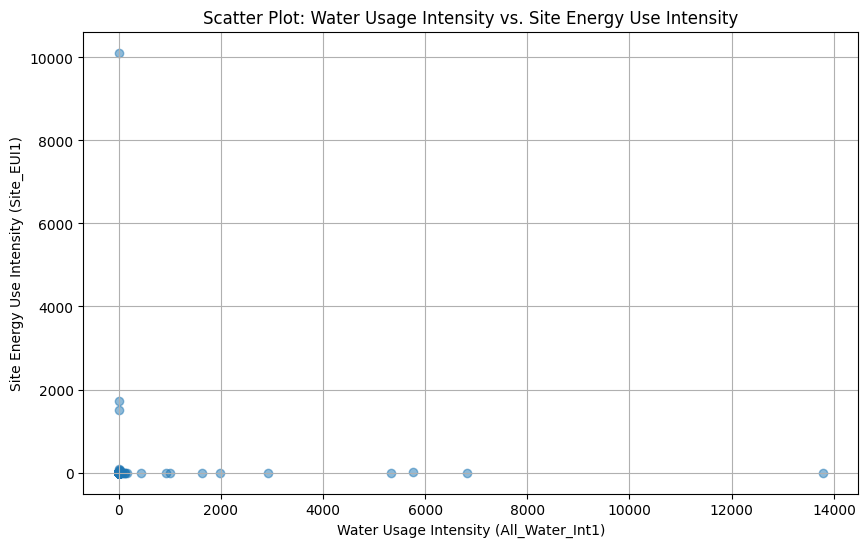

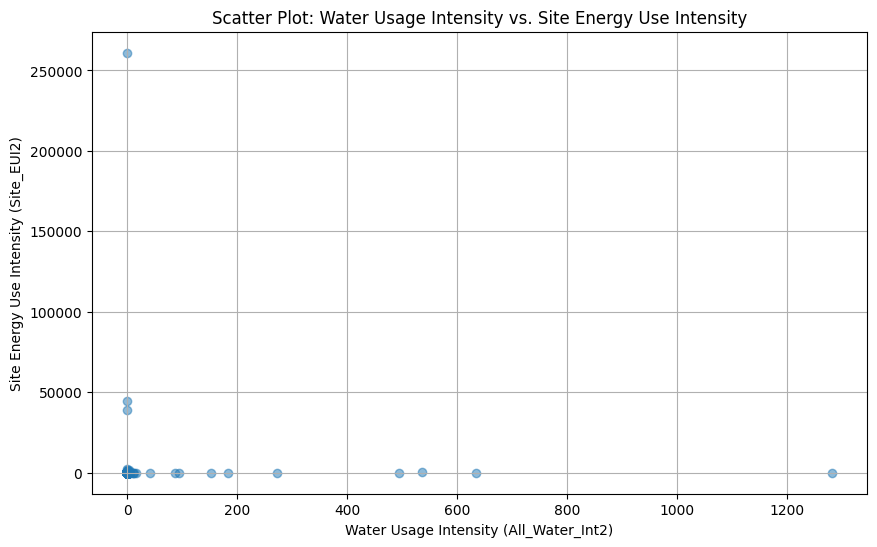

In [85]:
# Create scatter plots for water usage intensity vs. energy consumption intensity
plt.figure(figsize=(10, 6))

# Scatter plot for All_Water_Int1 vs. Site_EUI1
# plt.scatter(df_temp_3['All_Water_Int1'], df_temp_3['Site_EUI1'], alpha=0.5)
plt.scatter(df_temp_normalized_3['All_Water_Int1'], df_temp_normalized_3['Site_EUI1'], alpha=0.5)
plt.title('Scatter Plot: Water Usage Intensity vs. Site Energy Use Intensity')
plt.xlabel('Water Usage Intensity (All_Water_Int1)')
plt.ylabel('Site Energy Use Intensity (Site_EUI1)')
plt.grid(True)
plt.show()

# Scatter plot for All_Water_Int2 vs. Site_EUI2
plt.figure(figsize=(10, 6))
# plt.scatter(df_temp_3['All_Water_Int2'], df_temp_3['Site_EUI2'], alpha=0.5)
plt.scatter(df_temp_normalized_3['All_Water_Int2'], df_temp_normalized_3['Site_EUI2'], alpha=0.5)
plt.title('Scatter Plot: Water Usage Intensity vs. Site Energy Use Intensity')
plt.xlabel('Water Usage Intensity (All_Water_Int2)')
plt.ylabel('Site Energy Use Intensity (Site_EUI2)')
plt.grid(True)
plt.show()


In [86]:
# Calculate the Pearson correlation coefficient
pearson_corr1 = df_temp_3['All_Water_Int1'].corr(df_temp_3['Site_EUI1'], method='pearson')
pearson_corr2 = df_temp_3['All_Water_Int2'].corr(df_temp_3['Site_EUI2'], method='pearson')

# Calculate the Spearman correlation coefficient
spearman_corr1 = df_temp_3['All_Water_Int1'].corr(df_temp_3['Site_EUI1'], method='spearman')
spearman_corr2 = df_temp_3['All_Water_Int2'].corr(df_temp_3['Site_EUI2'], method='spearman')

pearson_corr1, pearson_corr2, spearman_corr1, spearman_corr2

(-0.0004955418969441328,
 -0.0004955418969441327,
 0.328910540548461,
 0.328910540548461)

In [87]:
# Calculate the Pearson correlation coefficient
pearson_corr1 = df_temp_normalized_3['All_Water_Int1'].corr(df_temp_normalized_3['Site_EUI1'], method='pearson')
pearson_corr2 = df_temp_normalized_3['All_Water_Int2'].corr(df_temp_normalized_3['Site_EUI2'], method='pearson')

# Calculate the Spearman correlation coefficient
spearman_corr1 = df_temp_normalized_3['All_Water_Int1'].corr(df_temp_normalized_3['Site_EUI1'], method='spearman')
spearman_corr2 = df_temp_normalized_3['All_Water_Int2'].corr(df_temp_normalized_3['Site_EUI2'], method='spearman')

pearson_corr1, pearson_corr2, spearman_corr1, spearman_corr2

(-0.0004955418969441328,
 -0.0004955418969441327,
 0.328910540548461,
 0.328910540548461)

In [ ]:
# Scatter plot showing the relationship between energy consumption and water usage
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df_temp_3, x='WN_Source_EUI1', y='All_Water_Int1', hue='Property_Type', palette='Set2')
# plt.title('Energy Consumption vs Water Usage by Building Type')
# plt.xlabel('Energy Consumption (WN_Source_EUI1)')
# plt.ylabel('Water Usage (All_Water_Int1)')
# plt.legend(title='Property Type')
# plt.tight_layout()
# plt.show()



In [ ]:
# from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
# X = df_temp_3[['WN_Source_EUI1']]  # Energy consumption
# y = df_temp_3['All_Water_Int1']    # Water usage

# X = df_temp_normalized_3[['WN_Source_EUI1']]  # Energy consumption
# y = df_temp_normalized_3['All_Water_Int1']    # Water usage

# # Instantiate and fit the model
# model = LinearRegression()
# model.fit(X, y)

# # Predict water usage from energy consumption
# y_pred = model.predict(X)

# # Visualize the linear relationship
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='WN_Source_EUI1', y='All_Water_Int1', hue='Property_Type', palette='Set2')
# plt.plot(X, y_pred, color='red', linestyle='--', label='Linear Fit')
# plt.title('Linear Regression: Energy Consumption vs Water Usage')
# plt.xlabel('Energy Consumption (WN_Source_EUI1)')
# plt.ylabel('Water Usage (All_Water_Int1)')
# plt.legend()
# plt.tight_layout()
# plt.show()

# # Print the regression coefficients
# print(f'Intercept: {model.intercept_}')
# print(f'Coefficient: {model.coef_}')

In [ ]:
# from sklearn.linear_model import LinearRegression

# # Prepare the data for linear regression
# X = df_temp_3[['WN_Source_EUI1']]  # Energy consumption
# y = df_temp_3['All_Water_Int1']    # Water usage

# # Instantiate and fit the model
# model = LinearRegression()
# model.fit(X, y)

# # Predict water usage from energy consumption
# y_pred = model.predict(X)

# # Visualize the linear relationship
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df_temp_3, x='WN_Source_EUI1', y='All_Water_Int1', hue='Property_Type', palette='Set2')
# plt.plot(X, y_pred, color='red', linestyle='--', label='Linear Fit')
# plt.title('Linear Regression: Energy Consumption vs Water Usage')
# plt.xlabel('Energy Consumption (WN_Source_EUI1)')
# plt.ylabel('Water Usage (All_Water_Int1)')
# plt.legend()
# plt.tight_layout()
# plt.show()

# # Print the regression coefficients
# print(f'Intercept: {model.intercept_}')
# print(f'Coefficient: {model.coef_}')

In [88]:
# plt.figure(figsize=(12, 6))
# sns.violinplot(data=df_temp_3, x='Property_Type', y='WN_Source_EUI1', palette='Set2')
# plt.title('Distribution of Energy Consumption by Property Type')
# plt.xlabel('Property Type')
# plt.ylabel('Energy Consumption (WN_Source_EUI1)')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.violinplot(data=df_temp_3, x='Property_Type', y='All_Water_Int1', palette='Set2')
# plt.title('Distribution of Water Usage by Property Type')
# plt.xlabel('Property Type')
# plt.ylabel('Water Usage (All_Water_Int1)')
# plt.tight_layout()
# plt.show()



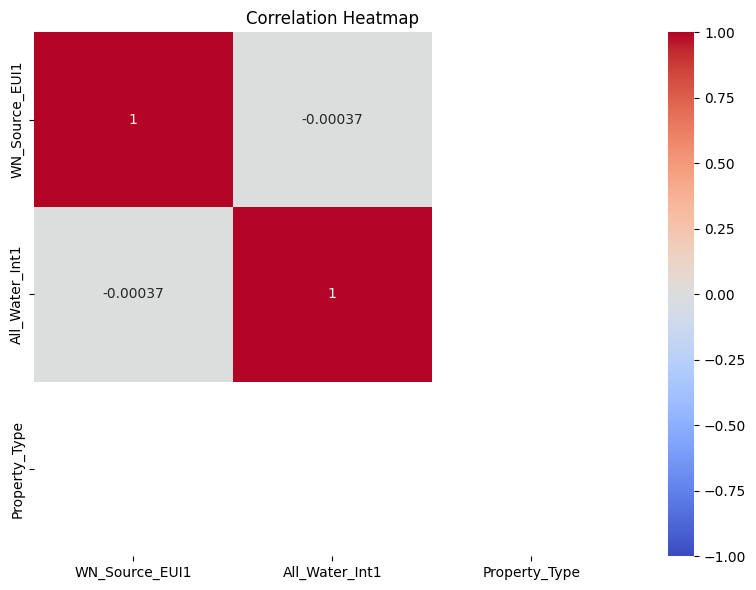

In [89]:
# Compute the correlation matrix
corr_matrix = df_temp_3[['WN_Source_EUI1', 'All_Water_Int1', 'Property_Type']].apply(pd.to_numeric, errors='coerce').corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



In [90]:
df_temp_normalized_3.head(15)

,EWRB_ID,City,Postal_Code,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Property_Type
0,105666,Toronto,M5A,Office,0.259626,6.700000,0.340613,9.131721,0.848365,0.188247,...,0.595201,15.360000,0.848239,21.890000,19.375040,1.8,53.424766,Yes,N,Commercial
1,113606,Bolton,L7E,Non-Refrigerated Warehouse,0.298376,7.700000,0.340613,9.131721,0.848365,0.513402,...,0.667664,17.230000,0.957514,24.710000,20.451431,1.9,11.000000,Yes,N,Industrial
2,125538,Toronto,M4W,"Office , Supermarket/Grocery Store , Parking...",0.538626,13.900000,0.721659,19.347429,1.797435,1.058585,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,Yes,N,Commercial
3,105425,Toronto,M5C,"Data Center , Office, Parking, Other",0.418501,10.800000,0.454151,12.175628,1.131153,0.285631,...,0.823439,21.250000,1.228765,31.710000,23.680604,2.2,74.000000,Yes,N,Commercial
4,105253,Toronto,M5H,"Data Center , Office, Parking, Other",0.379751,9.800000,0.340613,9.131721,0.848365,0.396460,...,0.731214,18.870000,1.099340,28.370000,20.451431,1.9,88.000000,Yes,N,Commercial
5,105101,Toronto,M5N,"Office , Other",0.244126,6.300000,0.340613,9.131721,0.848365,0.478360,...,0.761052,19.640000,0.924577,23.860000,0.000000,0.0,85.000000,Yes,N,Commercial
6,105116,Toronto,M5J,Office,0.432220,11.154049,0.721659,19.347429,1.797435,7.384968,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,No,N,Commercial
7,117124,Kitchener,N2A,"Parking , Enclosed Mall",0.432220,11.154049,0.340613,9.131721,0.848365,0.440873,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,No,Y,Commercial
8,117255,Kitchener,N2C,"Lifestyle Center , Parking",0.432220,11.154049,0.681226,18.263443,1.696729,0.385459,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,No,Y,Commercial
9,117479,Waterloo,N2J,"Strip Mall , Parking",0.432220,11.154049,0.454151,12.175628,1.131153,2.355535,...,1.530658,39.500776,2.115864,54.602819,0.000000,0.0,53.424766,No,Y,Commercial


In [91]:
df_temp_normalized_3.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'All_Prop_Types', 'WN_Sit_Elc_Int1',
       'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2',
       'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1',
       'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1',
       'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1',
       'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score',
       'Data_Qual_Check', 'Calculated with new source factors (Y/N)',
       'Property_Type'],
      dtype='object')

<ipython-input-92-620f0dfe6eef>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  building_data = df_temp_normalized_3.groupby('Property_Type')[['Source_EUI1', 'Ind_Water_Int1']].sum()


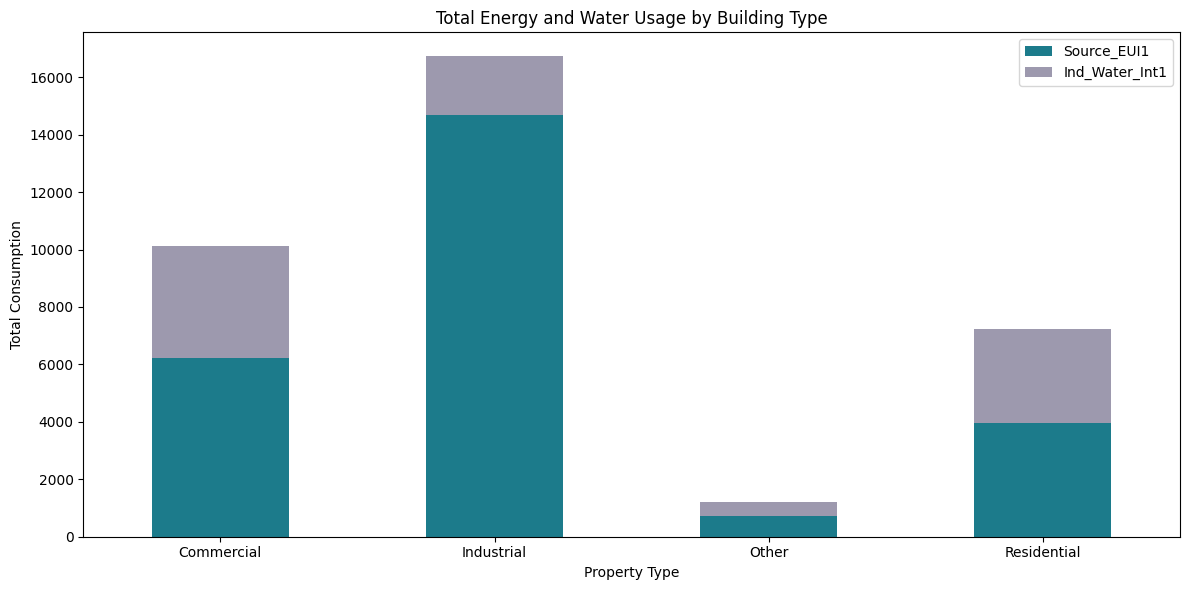

In [92]:


# Grouping by Building Type and summing energy and water usage
# building_data = df_temp_normalized_3.groupby('Property_Type')[['WN_Source_EUI1', 'All_Water_Int1']].sum()
building_data = df_temp_normalized_3.groupby('Property_Type')[['Source_EUI1', 'Ind_Water_Int1']].sum()

# Stacked bar plot for energy and water usage by building type
building_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1C7B8B', '#9D99AE'])
plt.title('Total Energy and Water Usage by Building Type')
plt.xlabel('Property Type')
plt.ylabel('Total Consumption')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

